In [258]:
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from pathlib import Path
from IPython.display import display
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import PIL
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
sns.set_theme()

In [267]:
__COLS__ = [ "Date","Workout Name", "Exercise Name", "Weight", "Reps"]

def load_preprocess(path, weight, user):
    # Data Loading
    data = pd.read_csv(Path(path).resolve(), sep=';', usecols=__COLS__, parse_dates=['Date'])
    data.columns = ["date", "wname", "ename", "w", "r"]

    # Data Type Cleaning
    data['w'] = data['w'].str.replace(',','.').astype(float)
    data = data.fillna(0.0)
    data["date"] = pd.to_datetime(data["date"])
    # Exercise Volume Computation
    data['volume'] = data['w'] * data['r']
    data['str'] = data['w'].astype(str) + "x" + data['r'].astype(str)
    data['1rm'] = data['w'] * (1 + (data['r']/30))
    data.loc[data['ename'].str.contains('Assisted'), 'volume'] = (weight - data.loc[data['ename'].str.contains('Assisted'), 'w'])*data.loc[data['ename'].str.contains('Assisted'), 'r']
    data['user'] = user
    
    return data

data_i = load_preprocess("../data/data.csv", 85, "Ivan")
data_c = load_preprocess("../data/claudia_1.csv", 60, "Claudia")
data = pd.concat([data_i, data_c])

In [268]:
pd.set_option('display.max_rows', None)
display(data)

,date,wname,ename,w,r,volume,str,1rm,user
0,2022-03-09 17:58:48,Petto Bicipiti,Bench Press (Barbell),40.0,20,800.0,40.0x20,66.666667,Ivan
1,2022-03-09 17:58:48,Petto Bicipiti,Bench Press (Barbell),50.0,12,600.0,50.0x12,70.000000,Ivan
2,2022-03-09 17:58:48,Petto Bicipiti,Bench Press (Barbell),55.0,8,440.0,55.0x8,69.666667,Ivan
3,2022-03-09 17:58:48,Petto Bicipiti,Bench Press (Barbell),57.5,6,345.0,57.5x6,69.000000,Ivan
4,2022-03-09 17:58:48,Petto Bicipiti,Incline Bench Press (Dumbbell),16.0,12,192.0,16.0x12,22.400000,Ivan
5,2022-03-09 17:58:48,Petto Bicipiti,Incline Bench Press (Dumbbell),20.0,8,160.0,20.0x8,25.333333,Ivan
6,2022-03-09 17:58:48,Petto Bicipiti,Incline Bench Press (Dumbbell),20.0,8,160.0,20.0x8,25.333333,Ivan
7,2022-03-09 17:58:48,Petto Bicipiti,Incline Bench Press (Dumbbell),20.0,8,160.0,20.0x8,25.333333,Ivan
8,2022-03-09 17:58:48,Petto Bicipiti,Chest Fly,40.0,15,600.0,40.0x15,60.000000,Ivan
9,2022-03-09 17:58:48,Petto Bicipiti,Chest Fly,50.0,8,400.0,50.0x8,63.333333,Ivan


In [280]:
def previous_weekday(d, weekday):
    return d - dt.timedelta(days = (d.weekday() - weekday))

def next_weekday(d, weekday):
    return d + dt.timedelta(days = (7 - d.weekday()) + weekday)

def setup_axes(ax, x, y, workout, y_name, annotation=None):
    
    ax.set_title(workout)
    ax.set_ylabel(y_name)
    
    start_time = x.iloc[0].to_pydatetime()
    end_time = x.iloc[-1].to_pydatetime()
    
    if(len(x) > 1):
        labels = list(pd.date_range(start = previous_weekday(start_time, 0), end = next_weekday(end_time, 0)+dt.timedelta(days=1), freq='7D'))
    else:
        labels = [previous_weekday(start_time, 0)]
        
    ax.plot(x, y, color='purple');
    ax.scatter(x, y, color='purple');
    ax.set_xticks(labels)
    ax.set_xticklabels(labels=labels,rotation=45, ha='right');
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    
    if not (annotation is None):
        for label,xs, ys in zip(annotation,x,y):
            t =  ax.text(xs, ys, label, ha="center", va="center", rotation=45, size=9,
                    bbox=dict(boxstyle="round,pad=0.3", fc="orange"))
            
def multipage(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()
    
    
def user_plot(ax, element, y_col):
    starts = []
    ends = []
    
    for user_name, user_table in element.groupby('user'):
        
        x = user_table["date"]
        
        starts.append(x.iloc[0].to_pydatetime())
        ends.append(x.iloc[-1].to_pydatetime())
        
        y = user_table[y_col].to_numpy()
        ax.plot(x, y, label=user_name);
        ax.scatter(x,y)
        
    start_time = min(starts)
    end_time = max(ends)
    labels = list(pd.date_range(start = previous_weekday(start_time, 0), end = next_weekday(end_time, 0)+dt.timedelta(days=1), freq='7D'))
    
    ax.set_xticks(labels)
    ax.set_xticklabels(labels=labels,rotation=45, ha='right');
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    
    ax.legend()
    
    return ax

/tmp/ipykernel_4788/984542751.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,5), dpi=100)


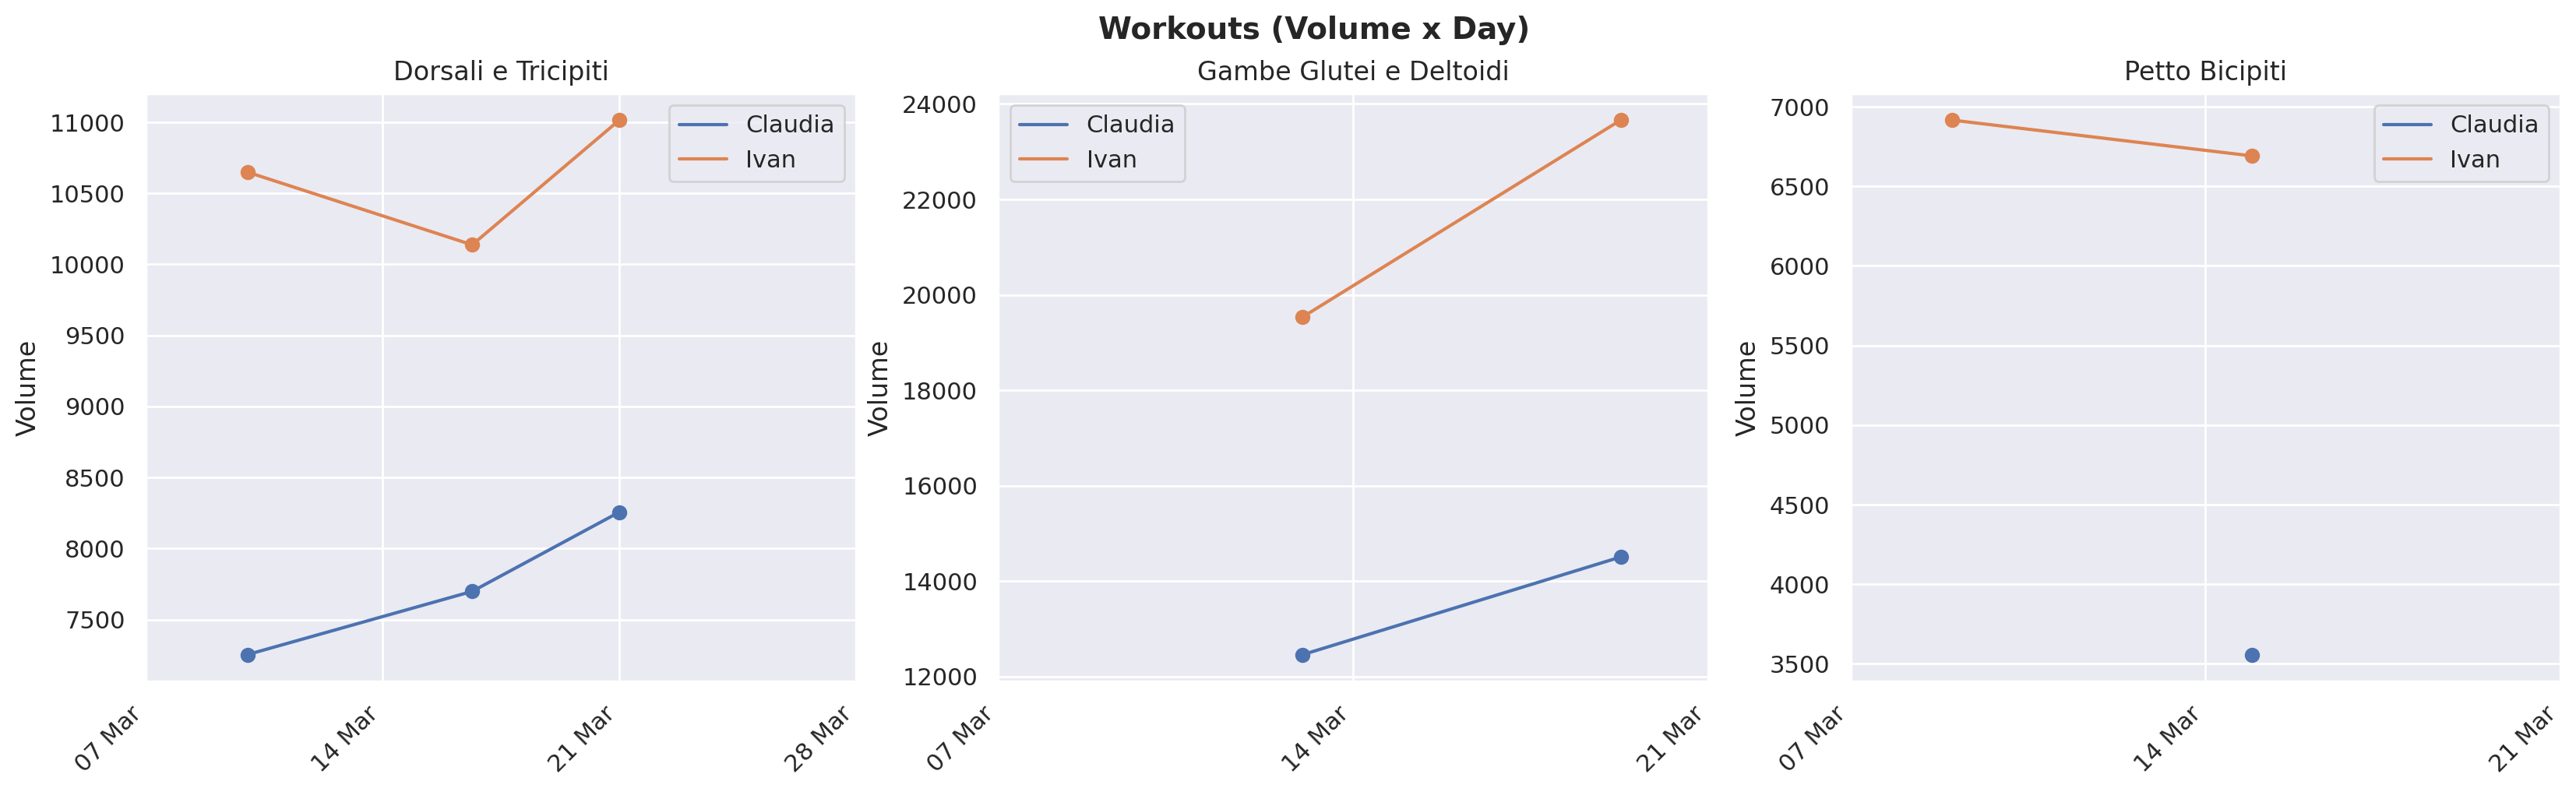

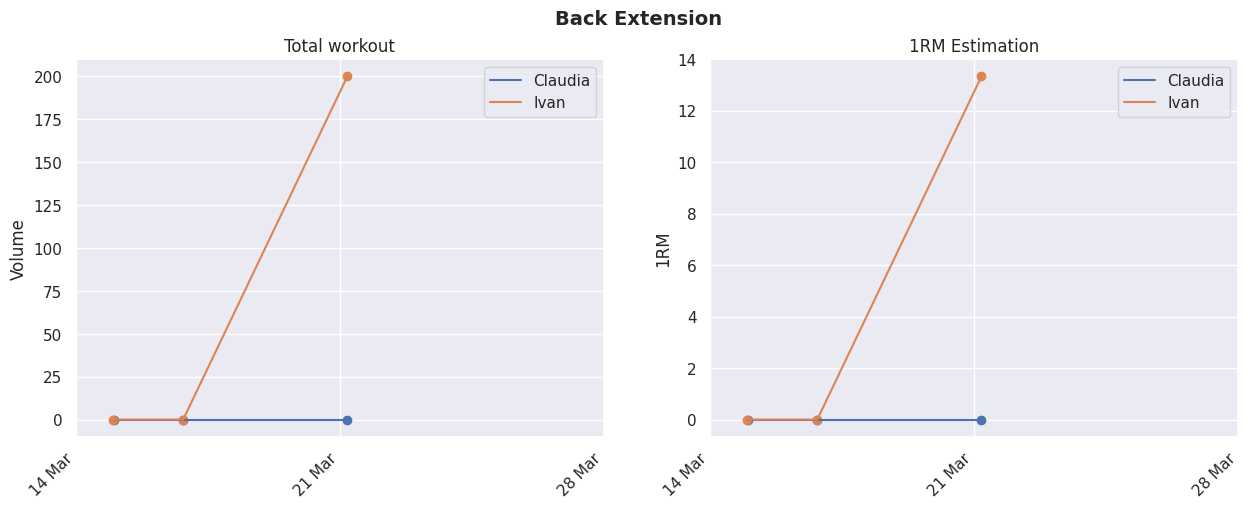

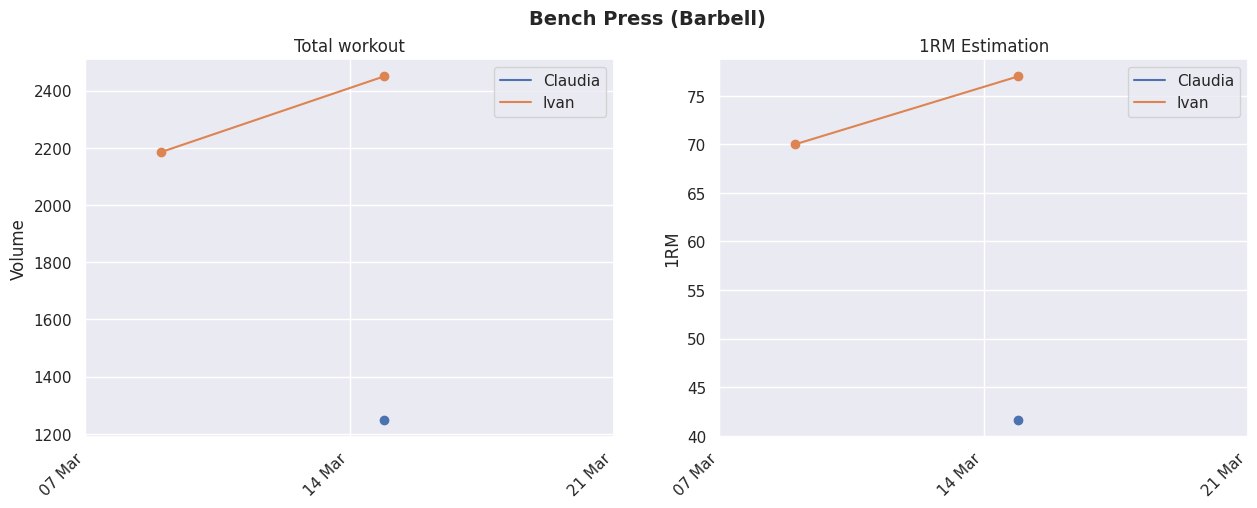

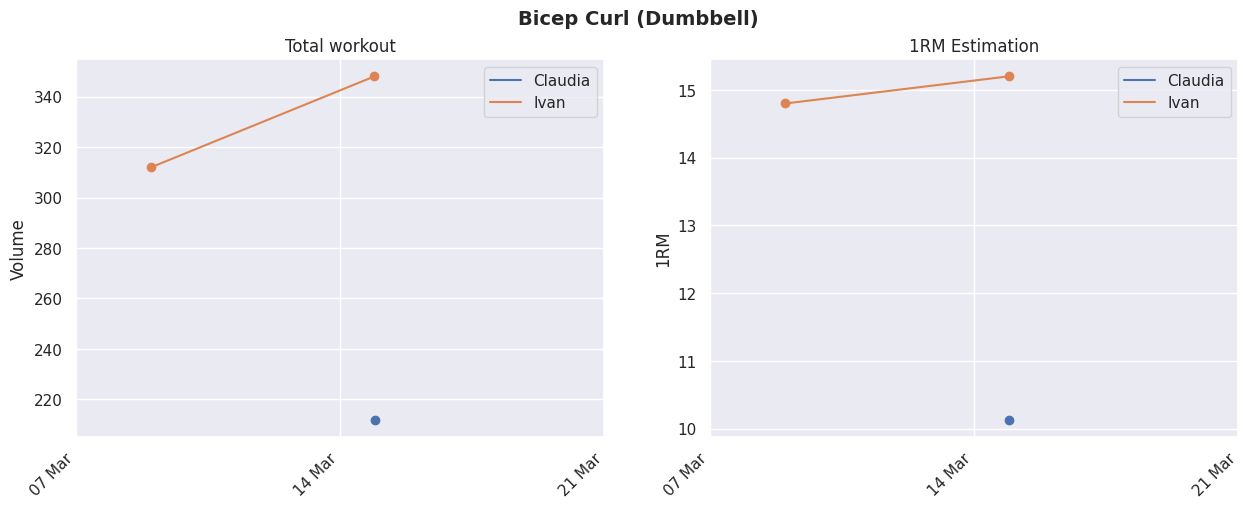

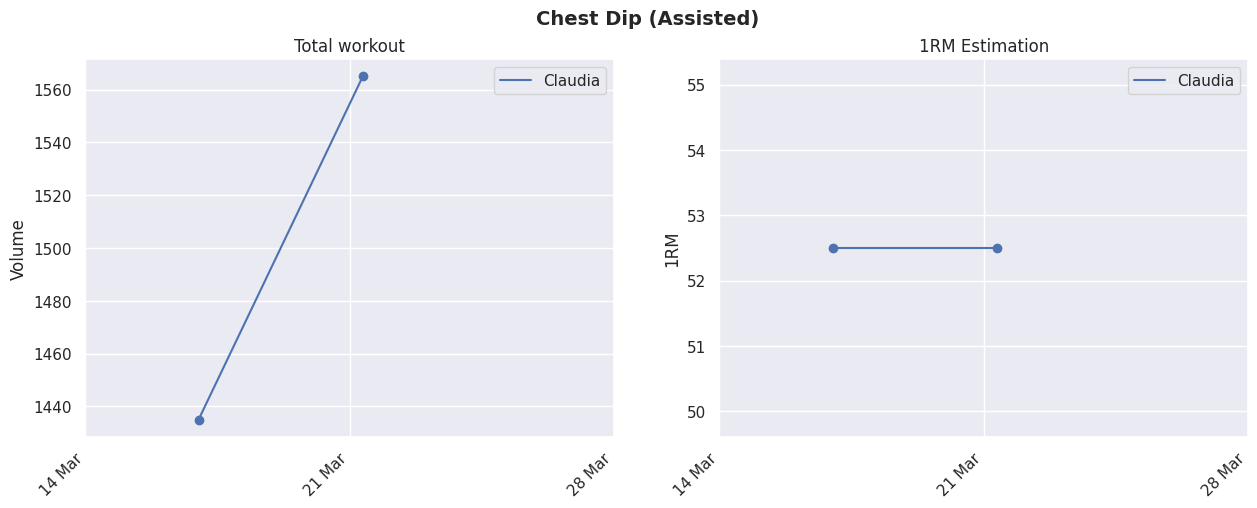

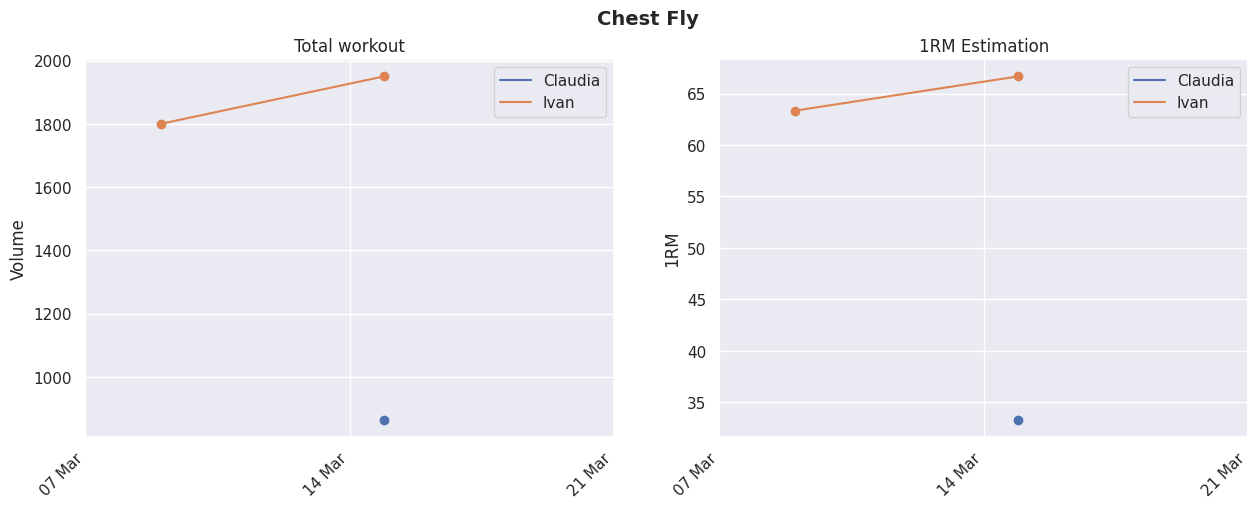

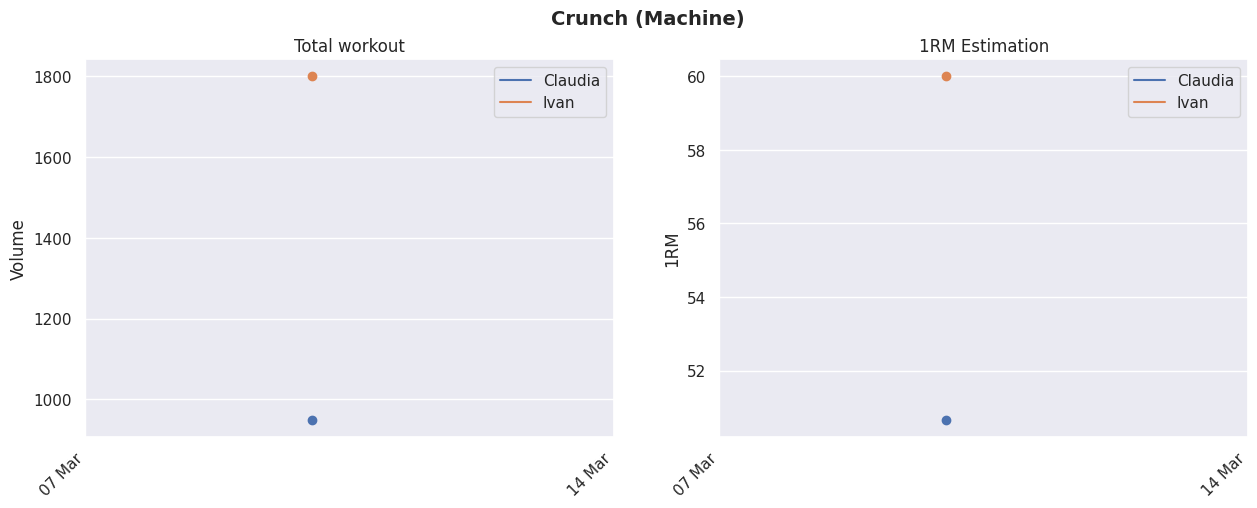

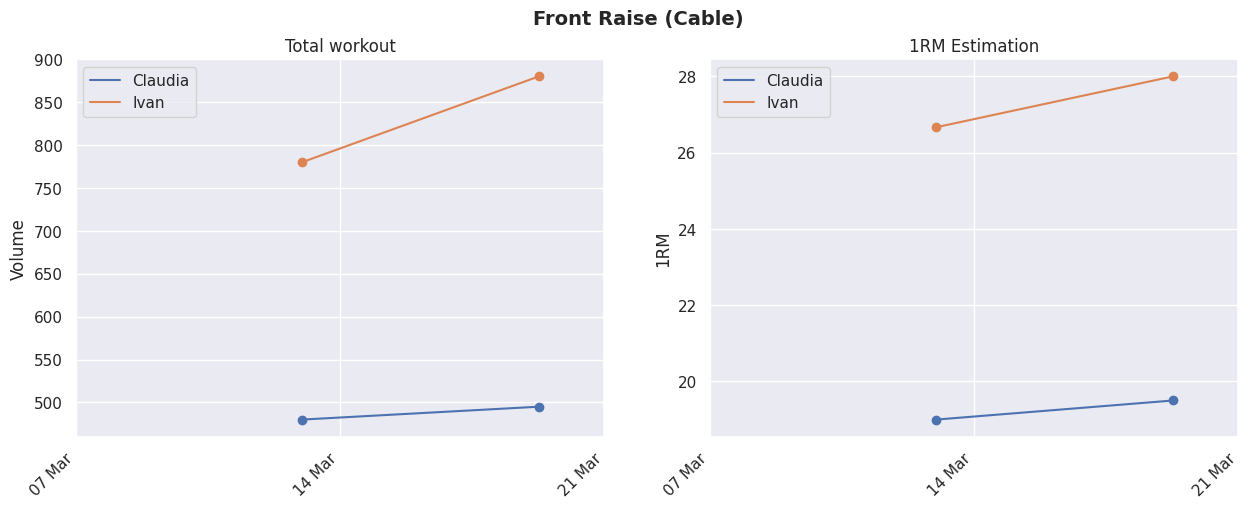

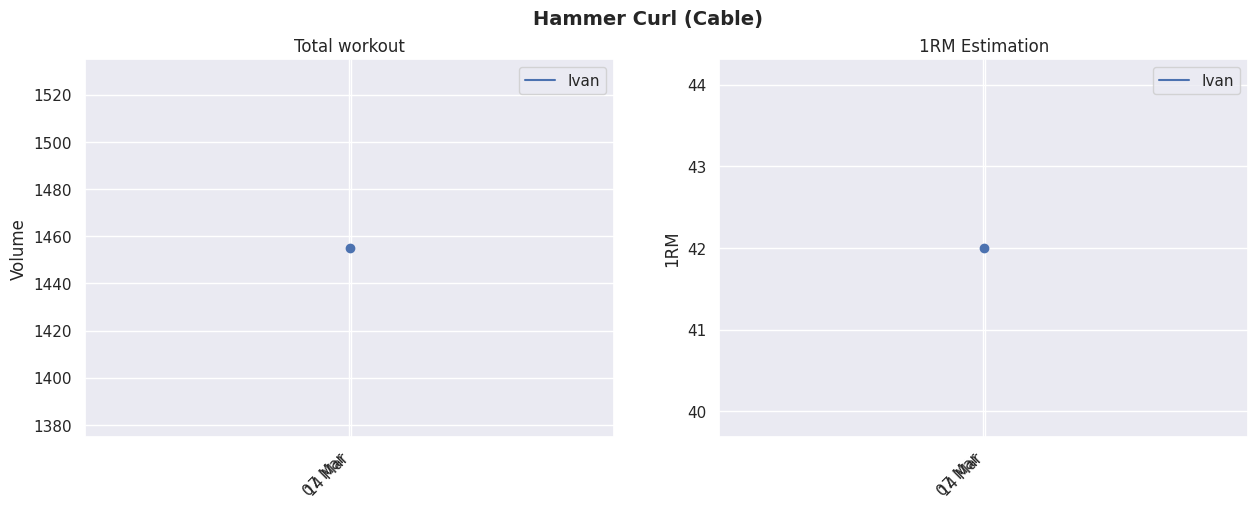

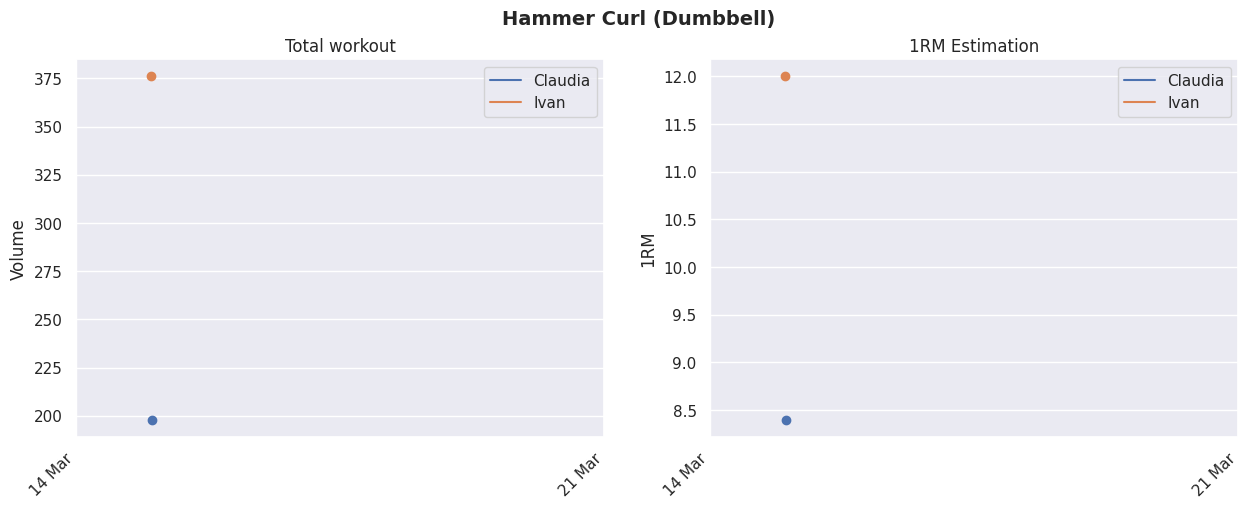

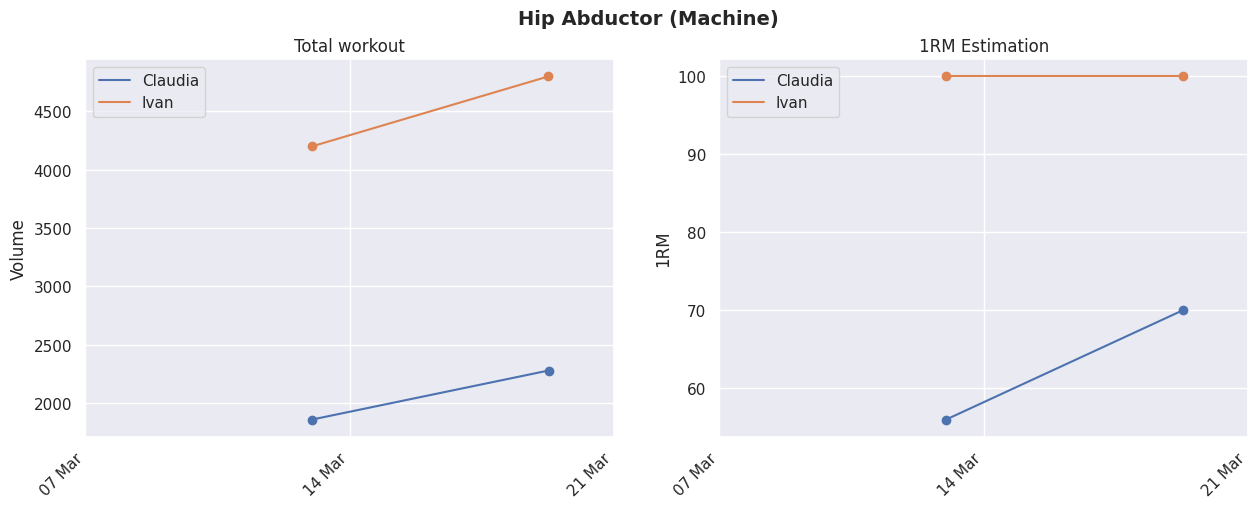

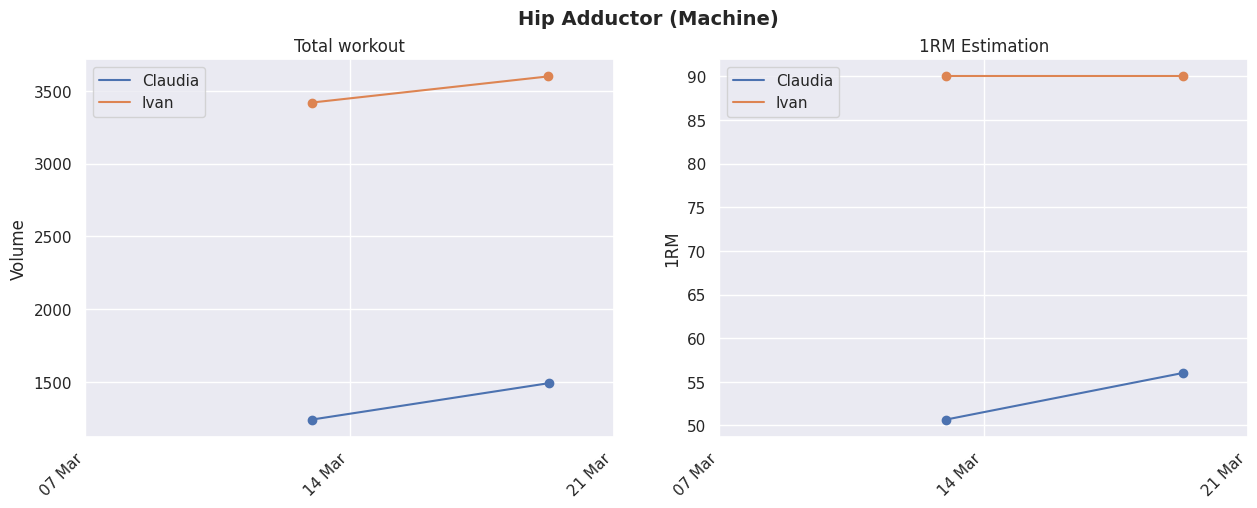

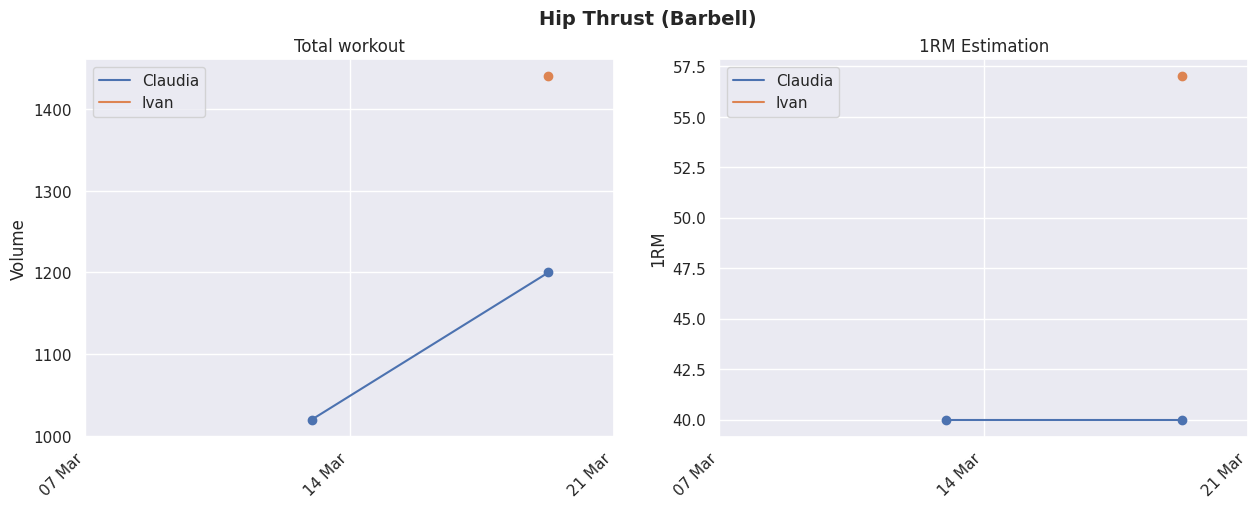

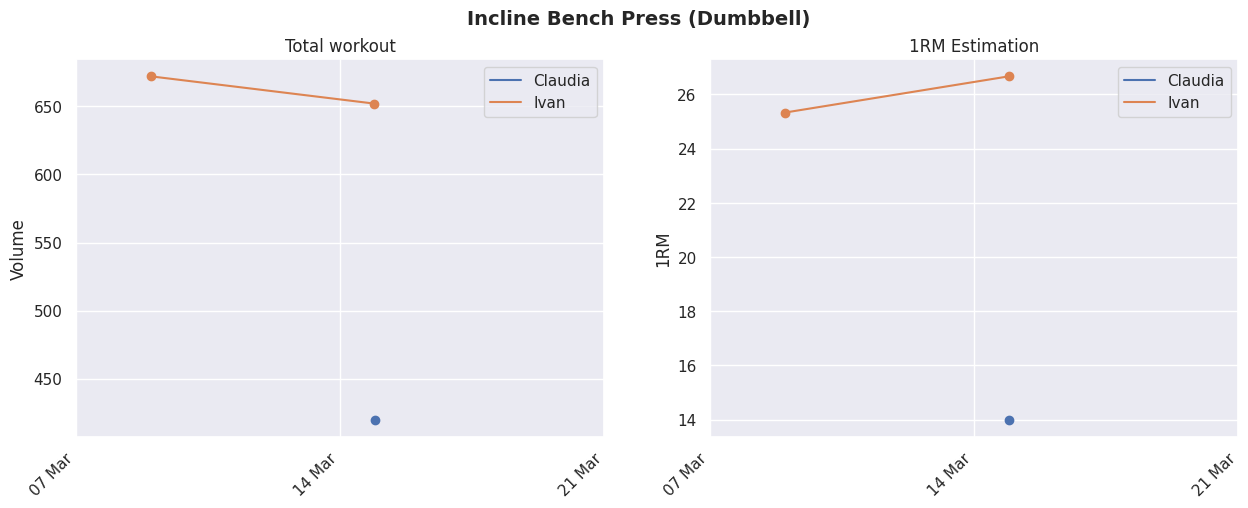

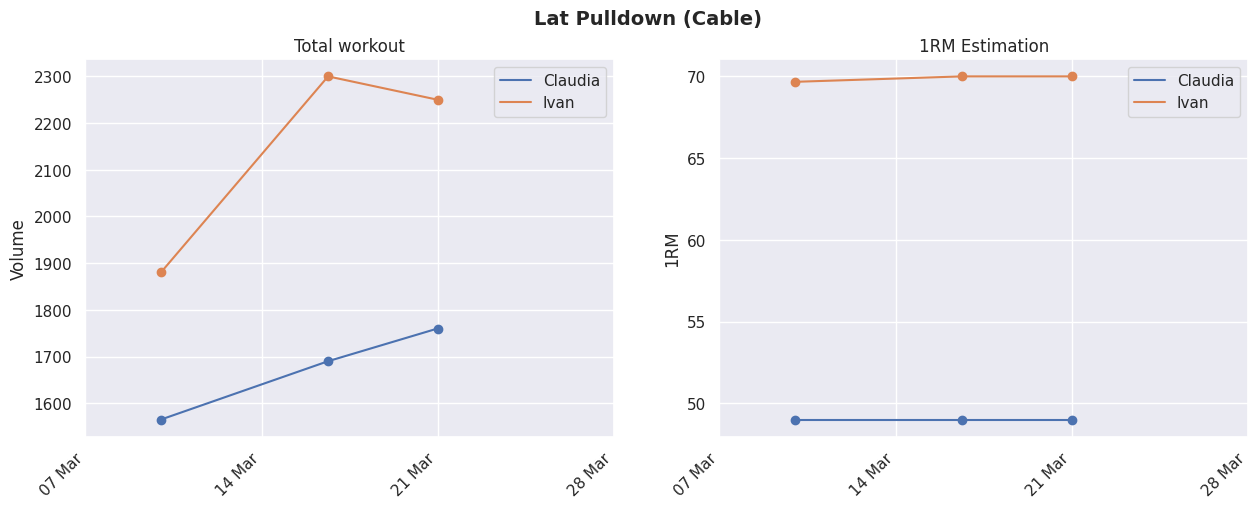

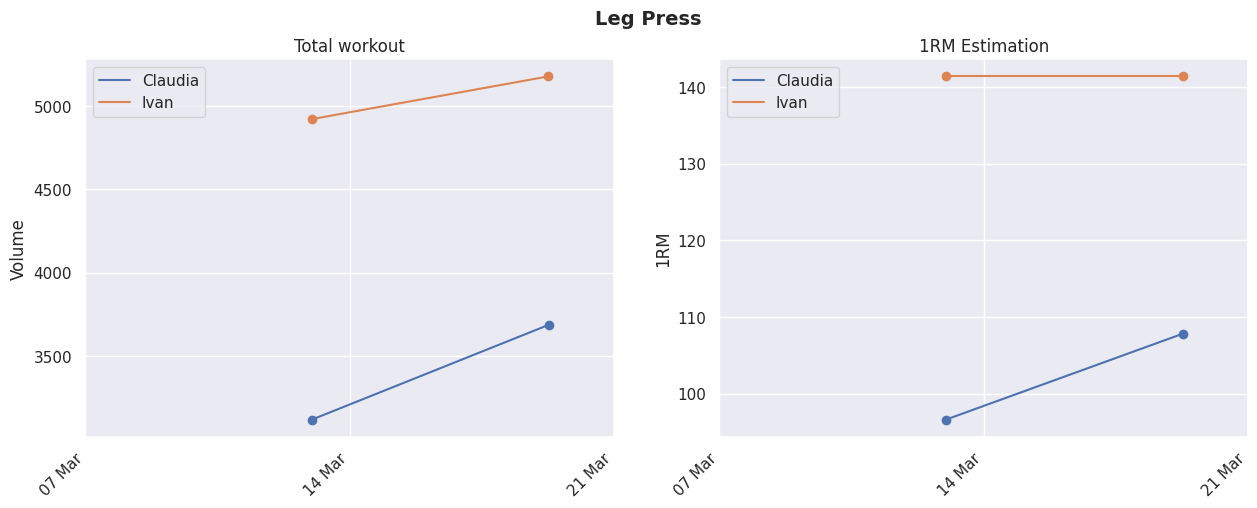

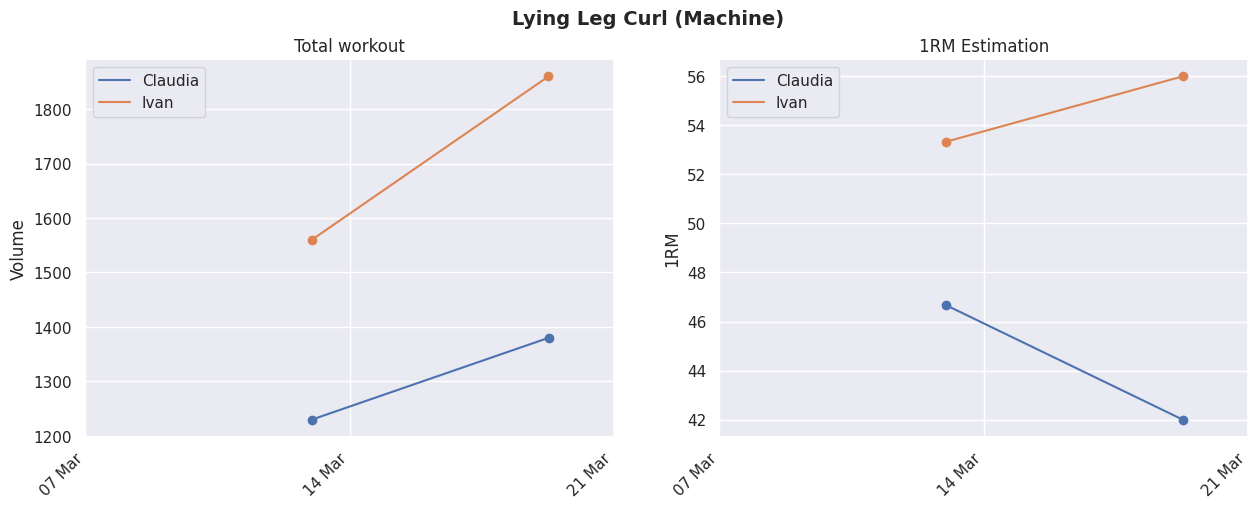

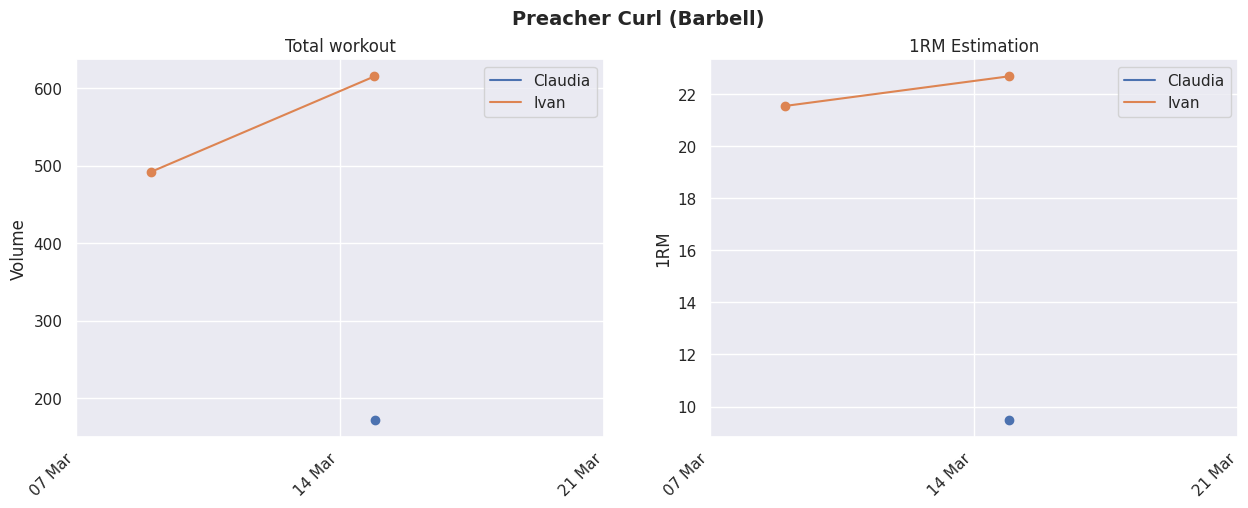

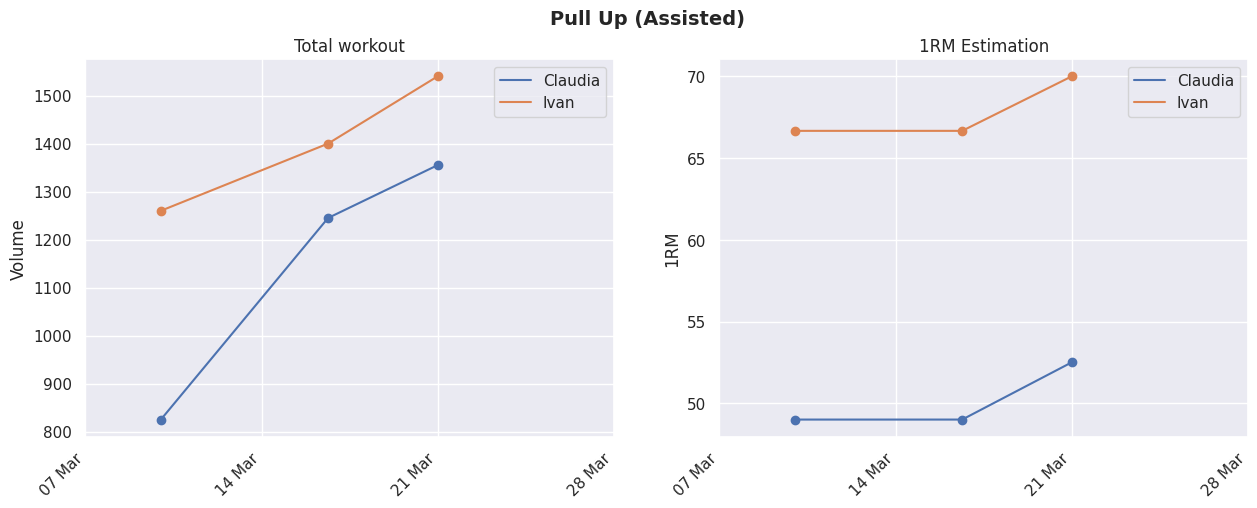

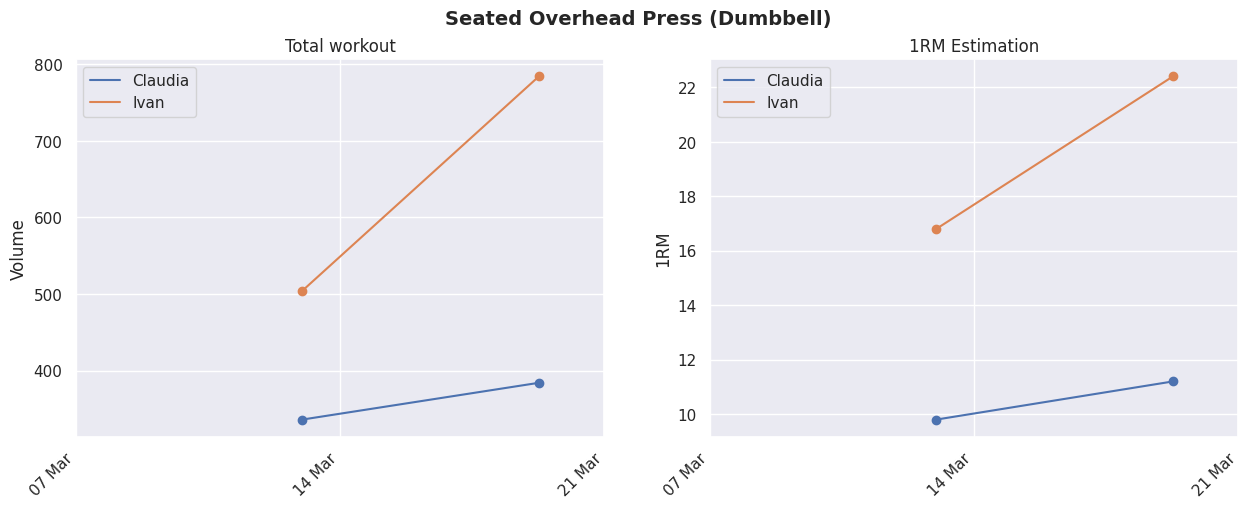

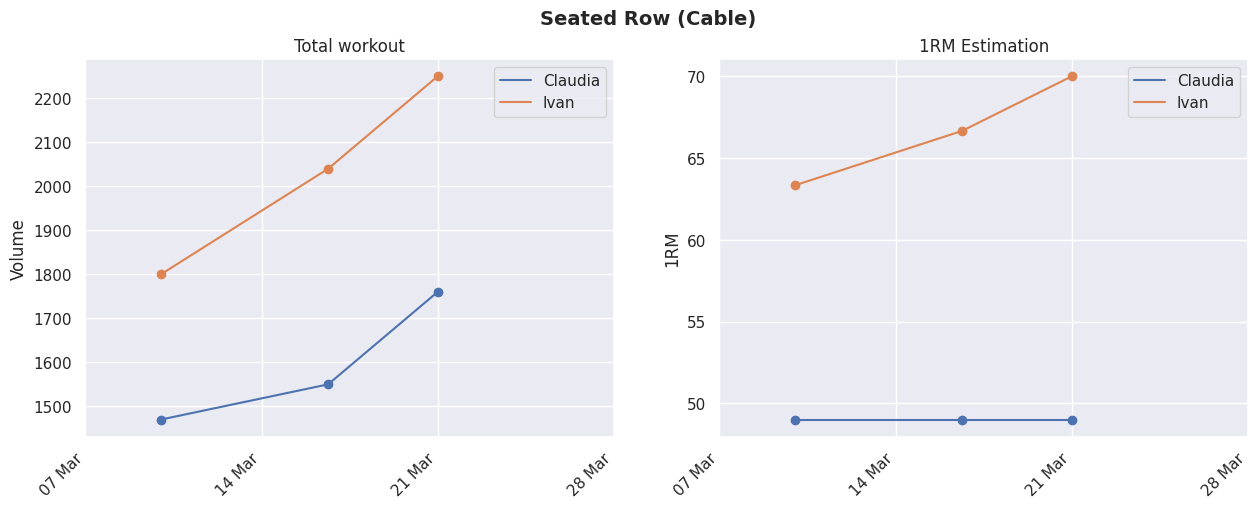

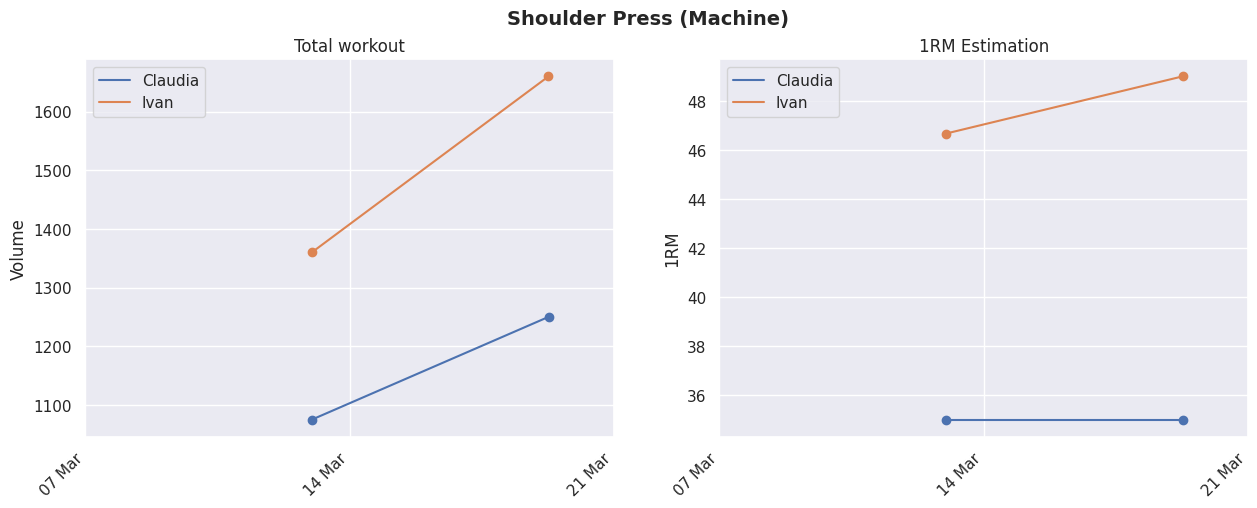

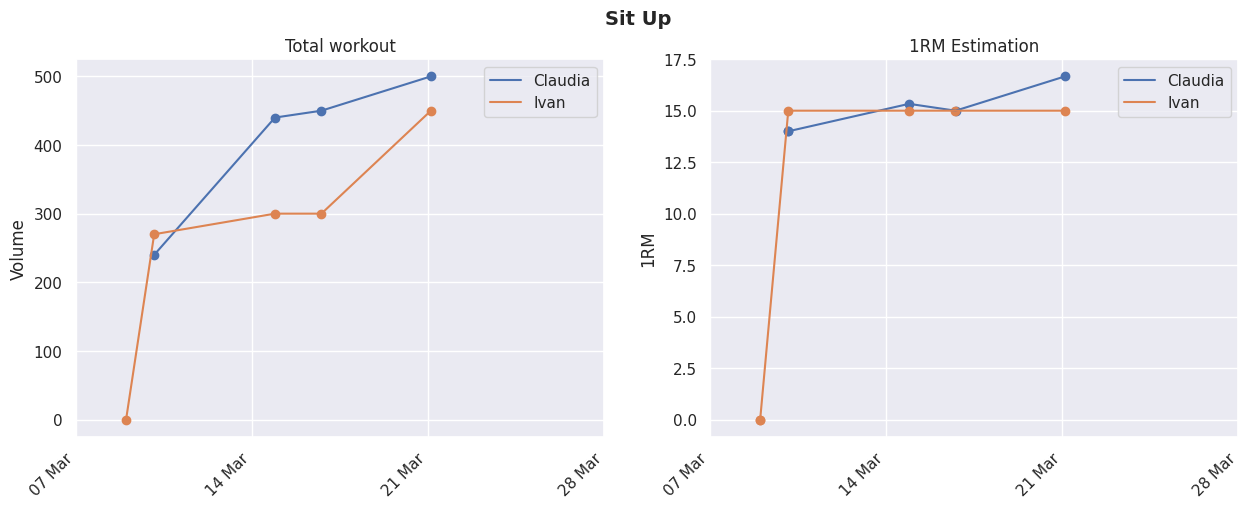

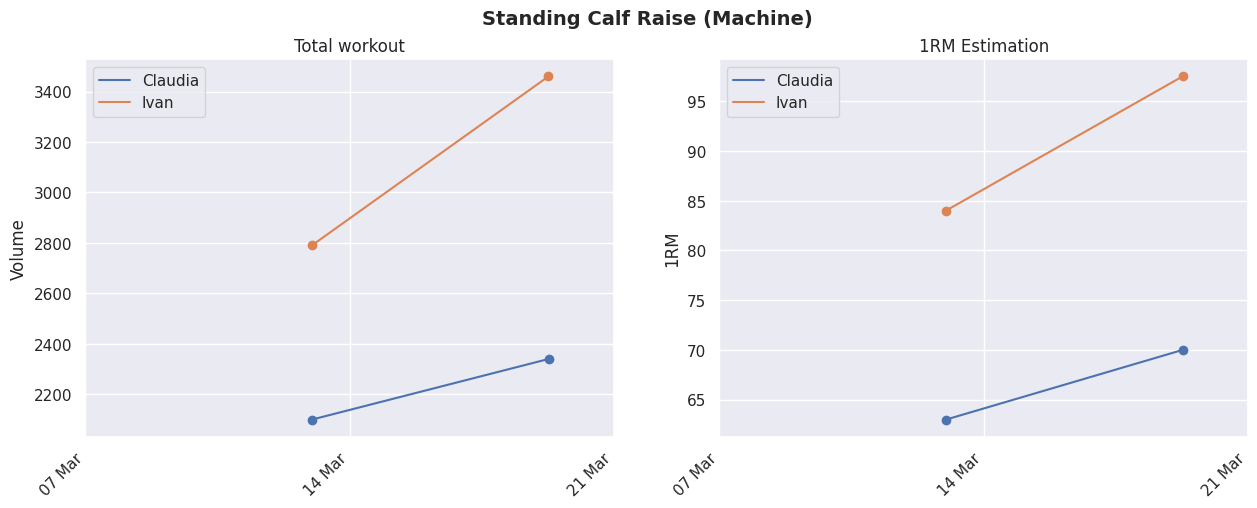

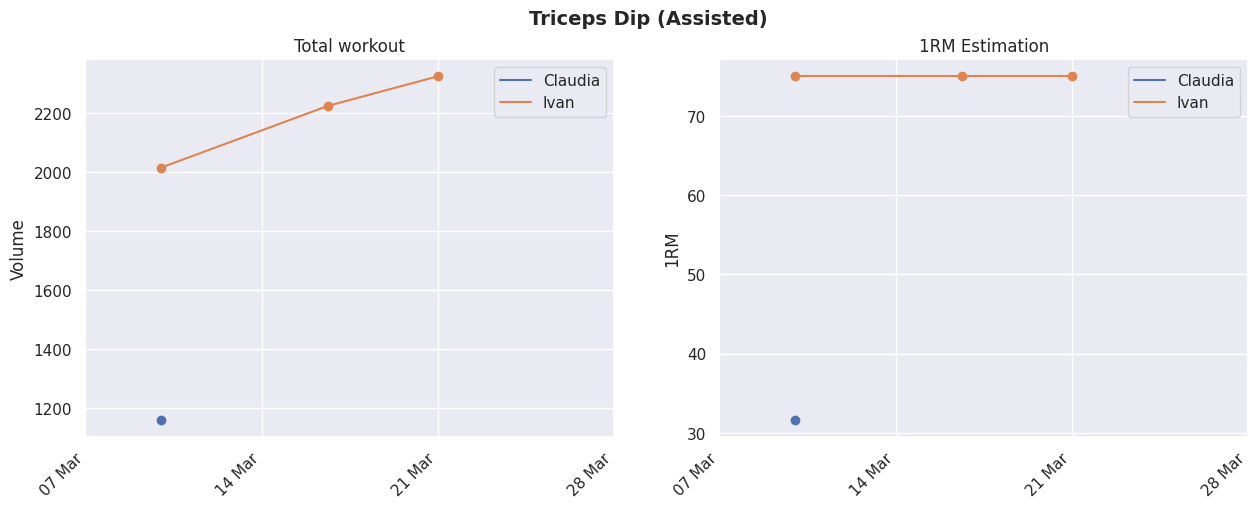

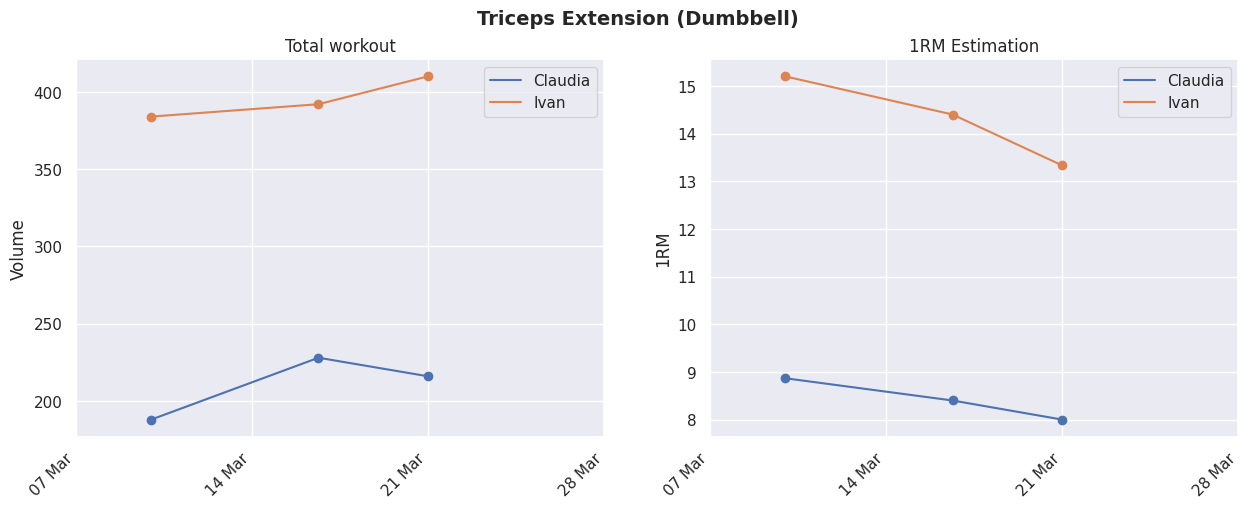

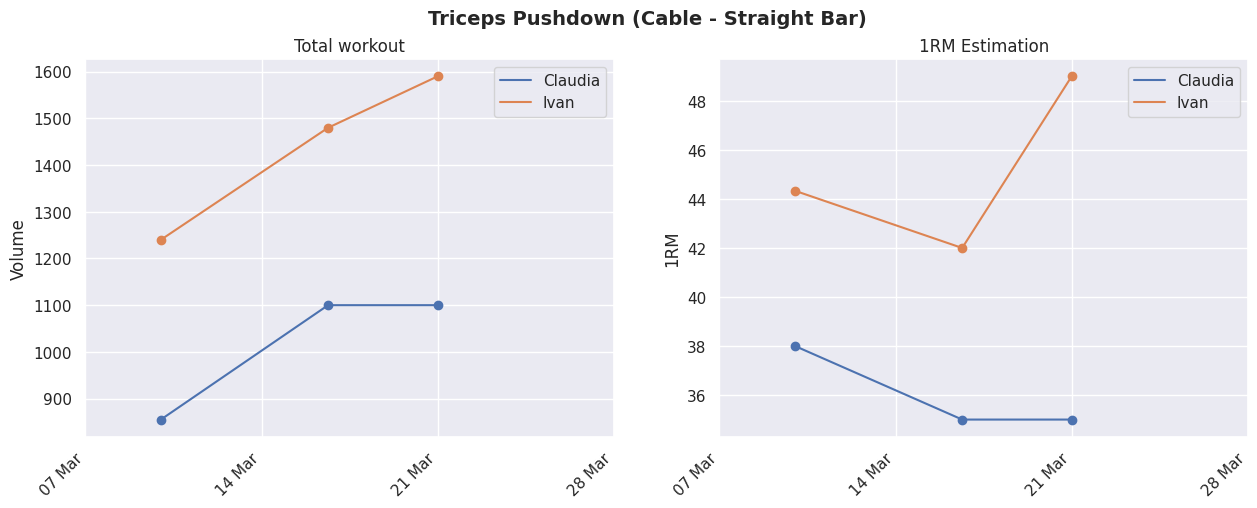

In [292]:
%matplotlib inline

agg_value = data.groupby(['date', 'wname', 'user'], as_index=False)[['date', 'wname', 'volume', 'user']].sum()

fig= plt.figure(figsize=(20,5), dpi=200)
index = 1
fig.suptitle("Workouts (Volume x Day)", fontsize=14, fontweight='bold')
fig.tight_layout()

for element_name, element in agg_value.groupby('wname'):
    ax = fig.add_subplot(1,3,index)
    
    ax.set_title(element_name)
    ax.set_ylabel("Volume")
    
    ax = user_plot(ax, element, "volume")
    
    index+=1
     
for group_name, dfe in data[['ename','date', 'w', 'r', 'volume','1rm', 'str', 'user']].groupby(['ename']):
    
    
    fig = plt.figure(figsize=(15,5), dpi=100)
    fig.suptitle(group_name, fontsize=14, fontweight='bold')
    fig.tight_layout()

    agg_ex = dfe.groupby(['date', 'user'], as_index=False)[['date','volume']].sum()     
    
    ax_volume = fig.add_subplot(1,2,1)
    ax_volume.set_title("Total workout")
    ax_volume.set_ylabel("Volume")
    ax_volume = user_plot(ax_volume, agg_ex, "volume")
    
    
    rm_data = dfe.loc[dfe.groupby(['date','user'])['1rm'].idxmax()].sort_values(by='date')
    
    ax_1rm = fig.add_subplot(1,2,2)
    ax_1rm.set_title("1RM Estimation")
    ax_1rm.set_ylabel("1RM")
    ax_1rm = user_plot(ax_1rm, rm_data, "1rm")
   
    
multipage('multipage.pdf')

/tmp/ipykernel_4788/4276405.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,5), dpi=100)


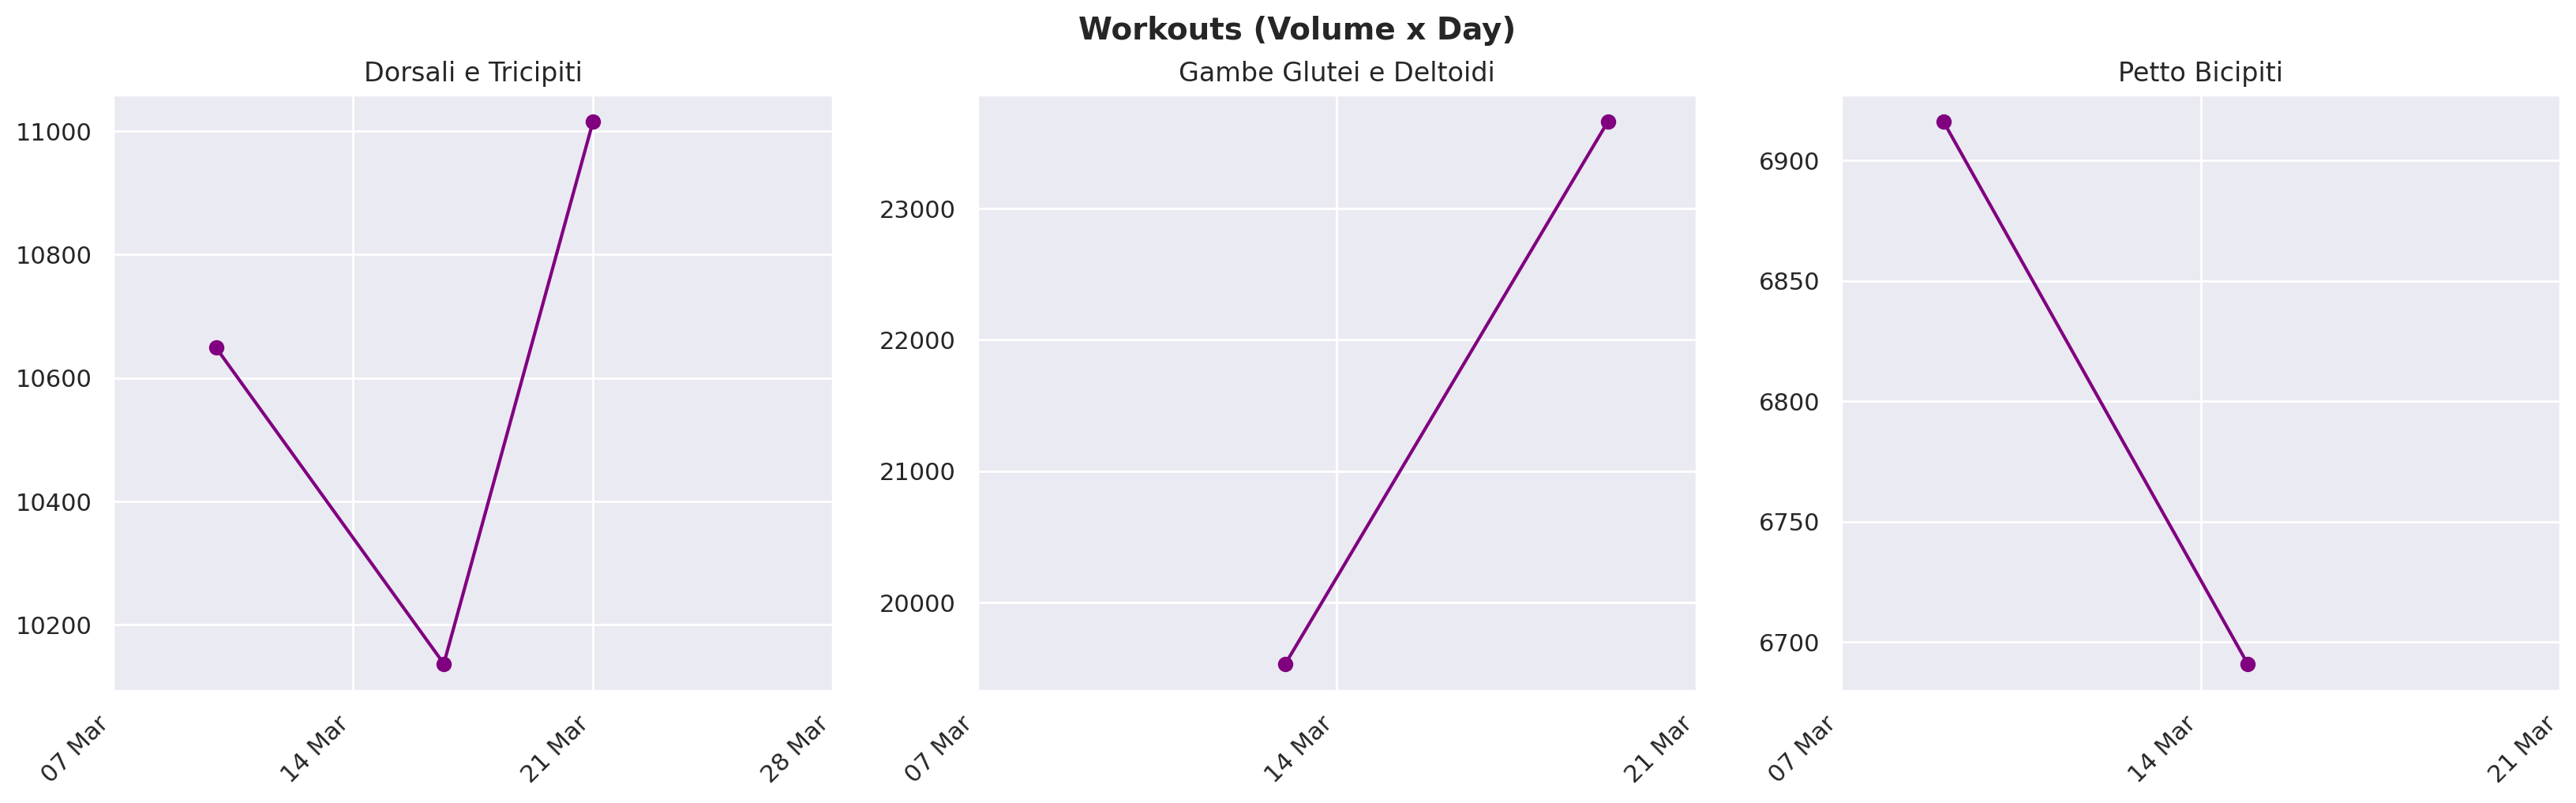

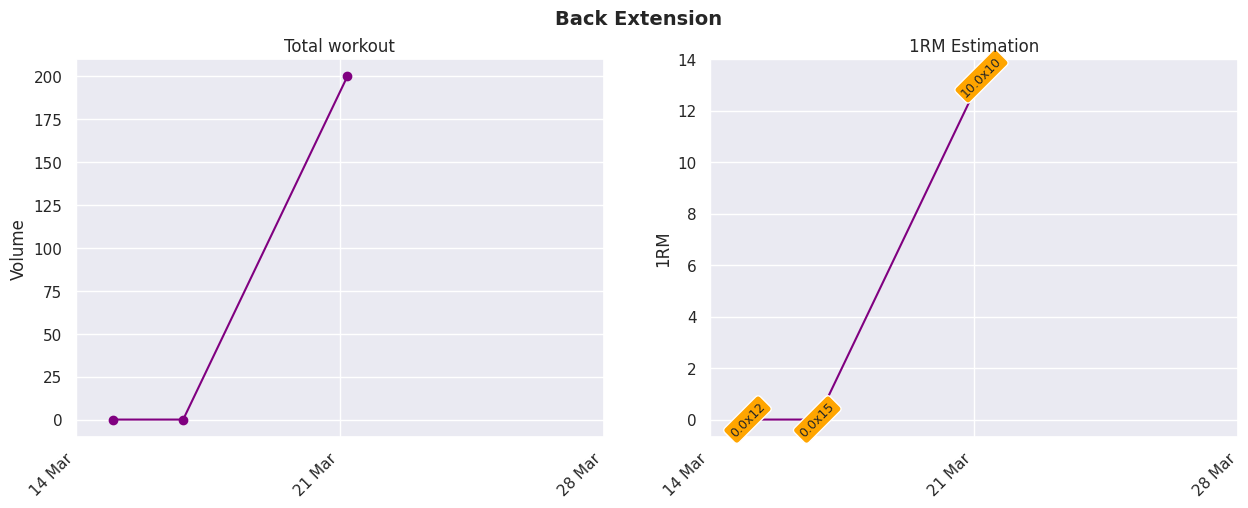

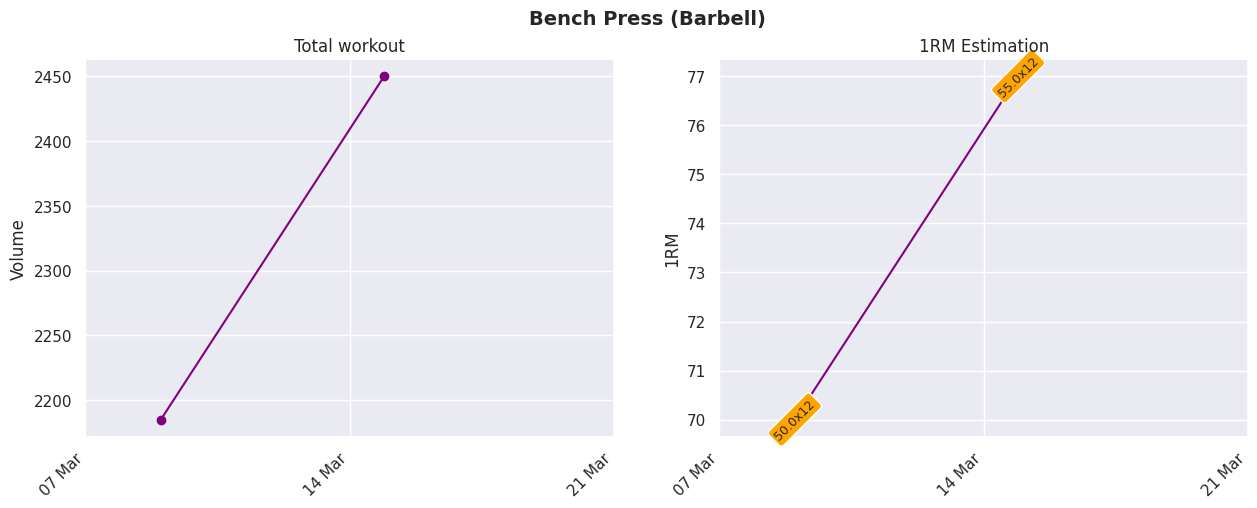

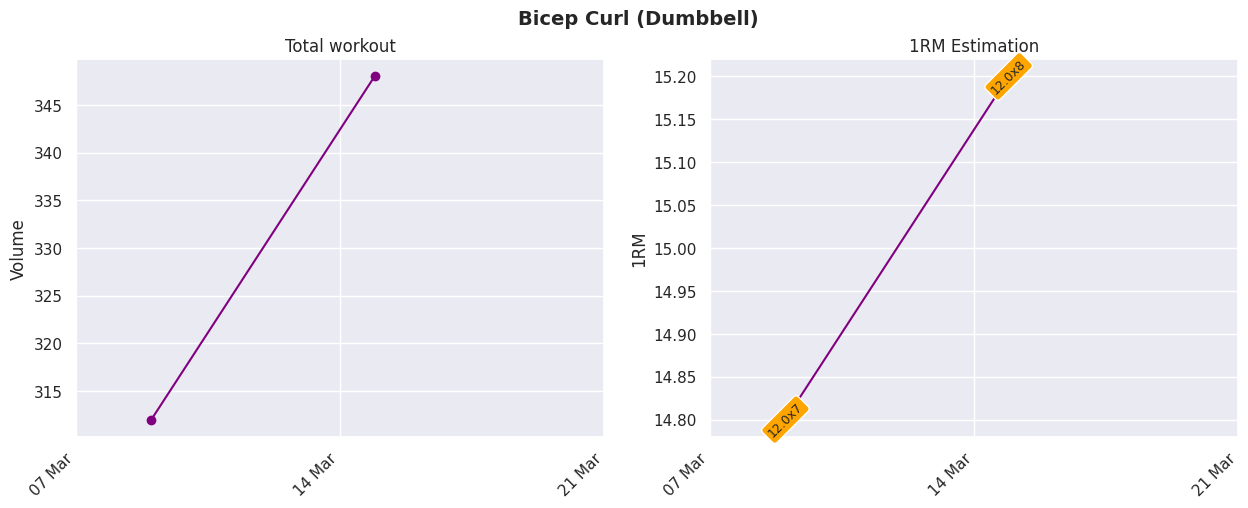

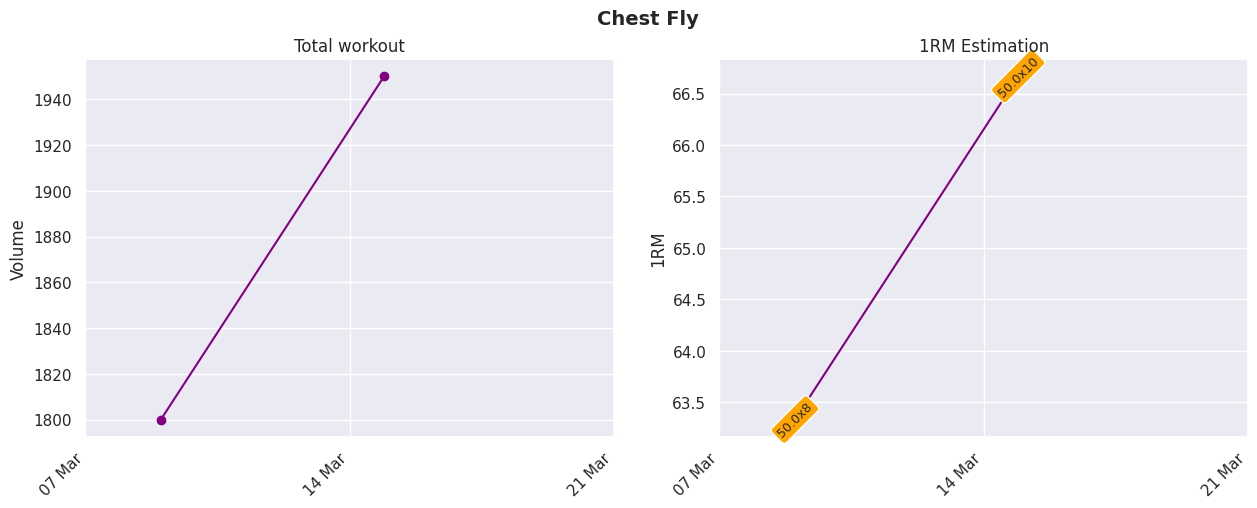

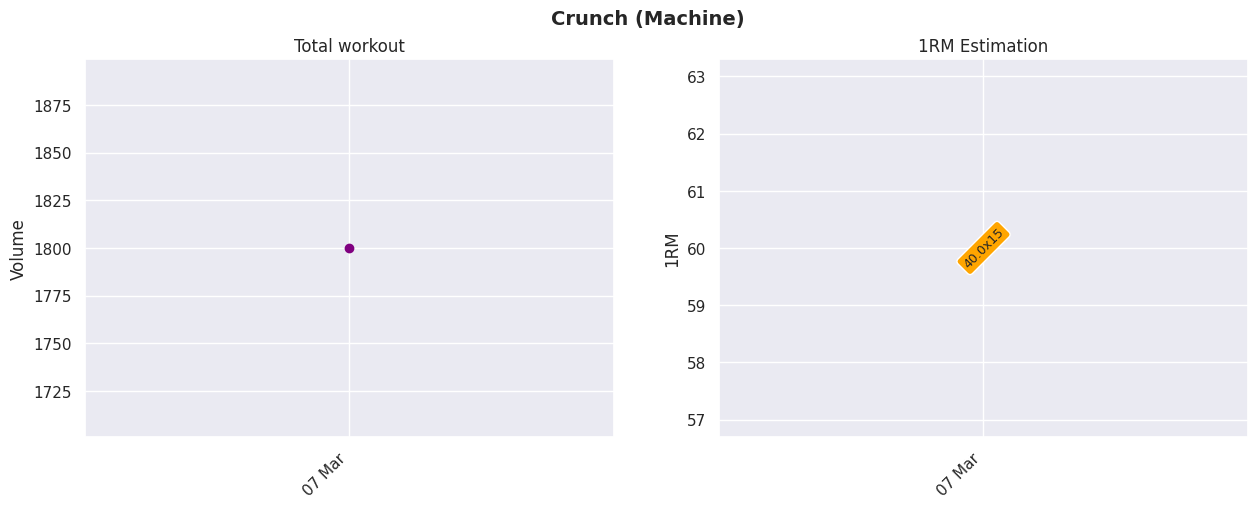

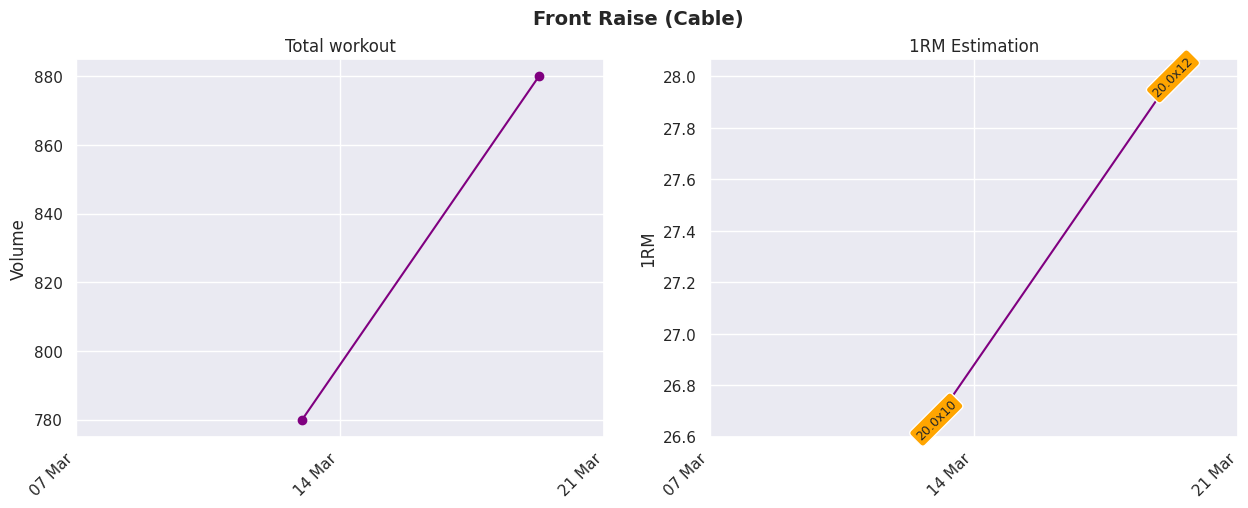

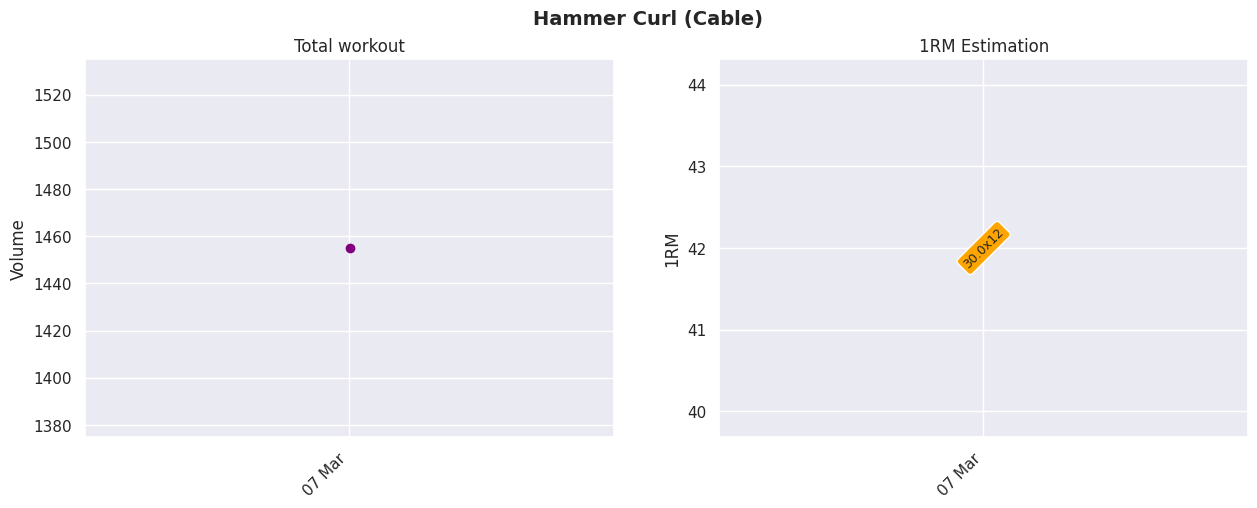

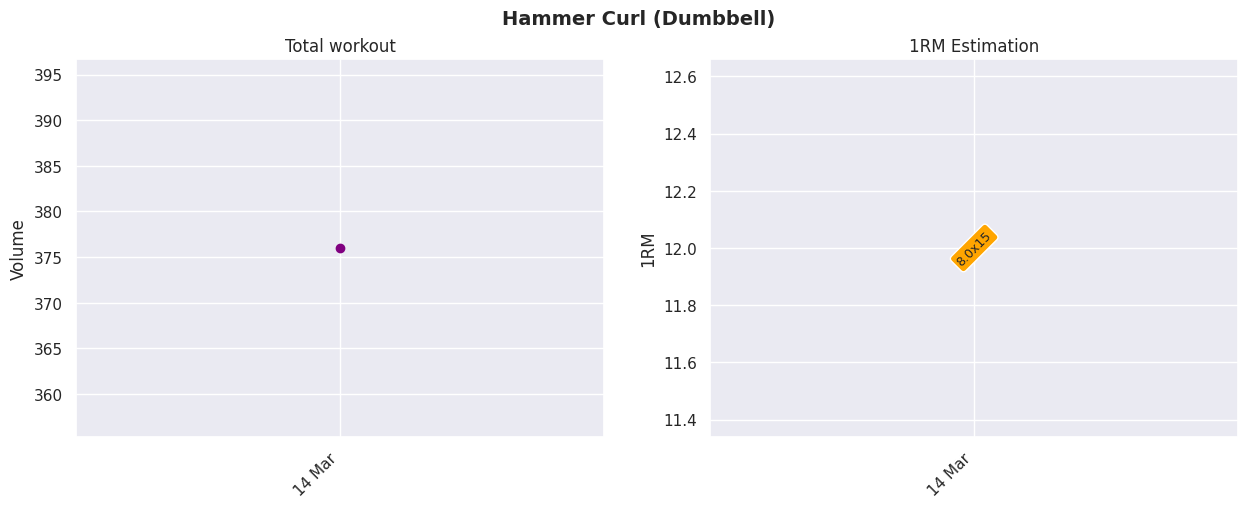

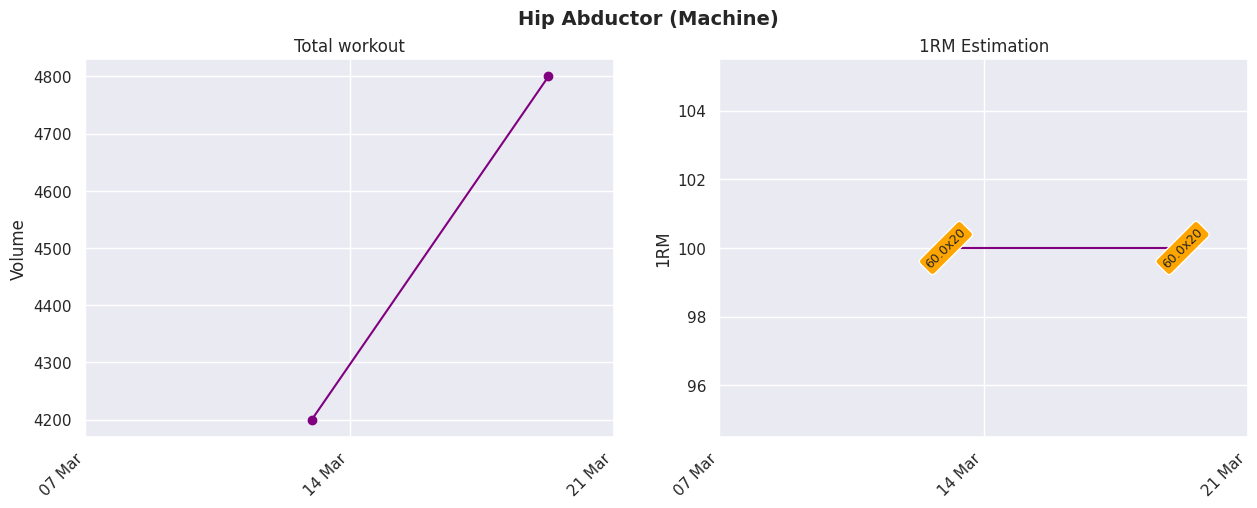

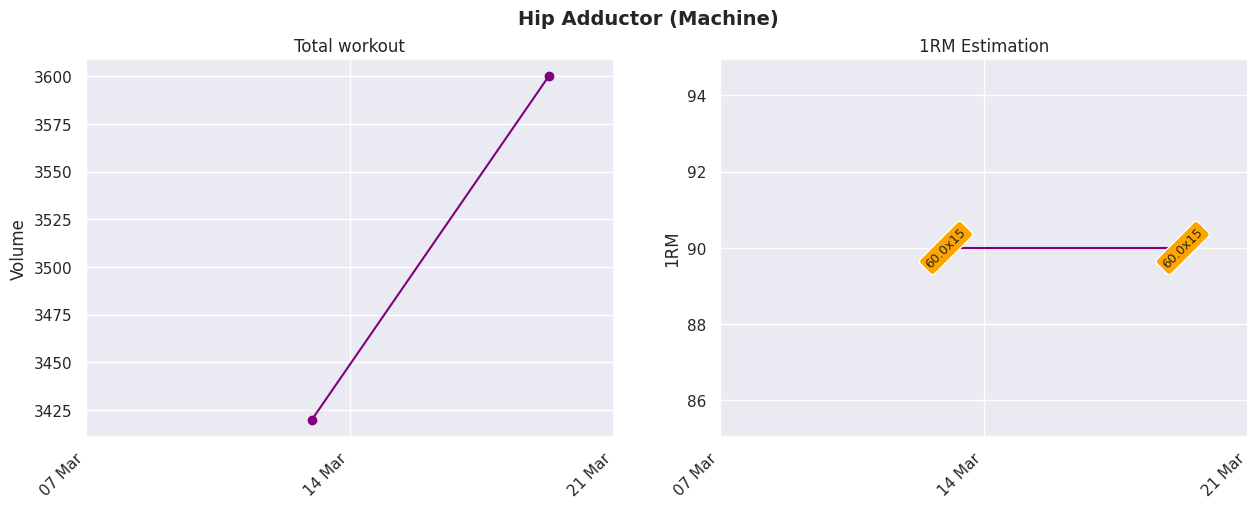

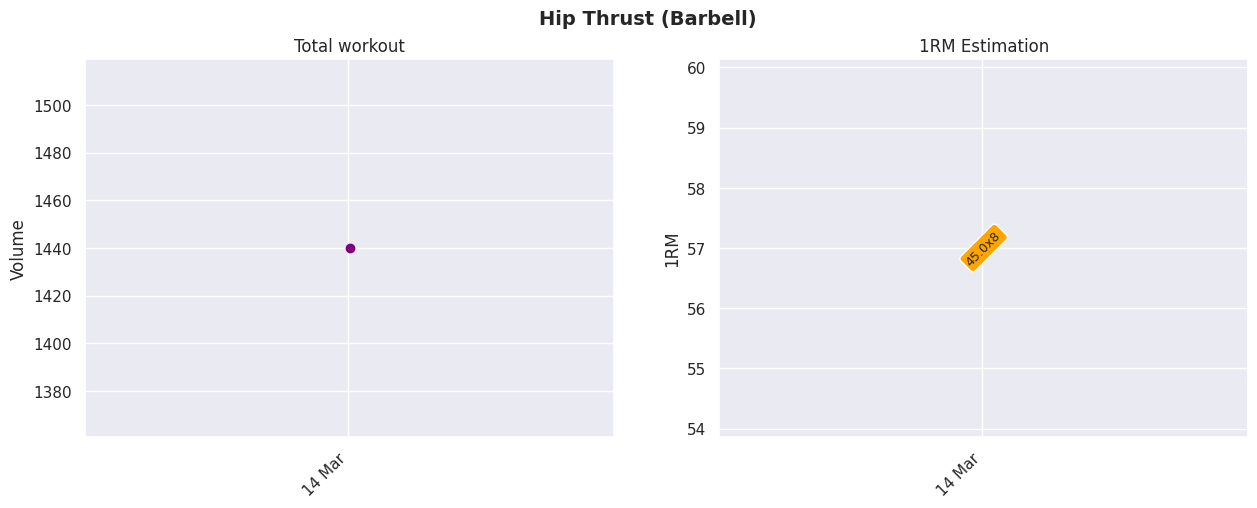

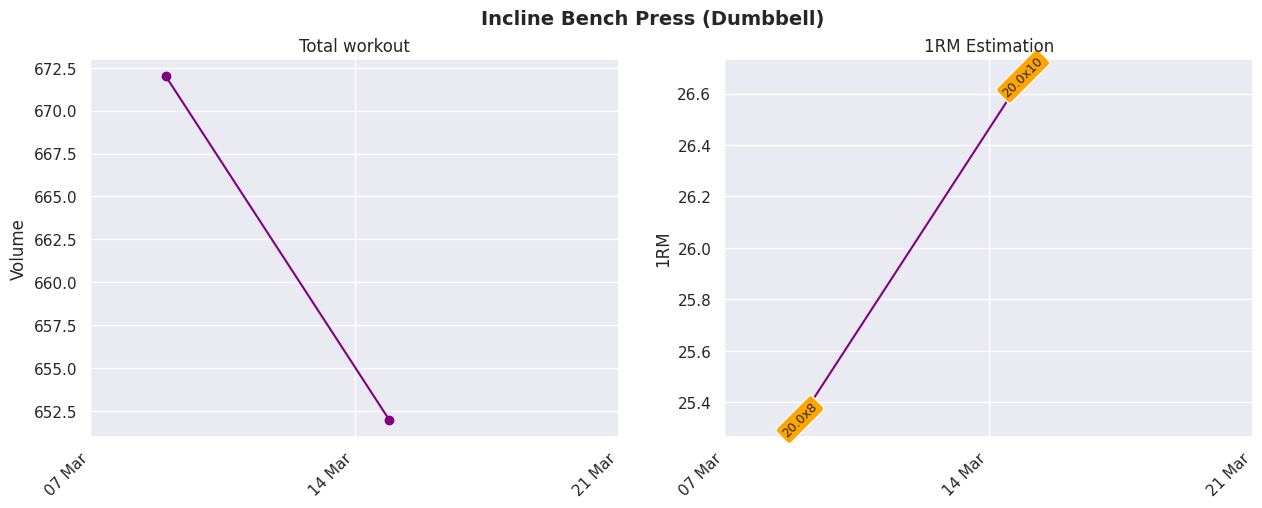

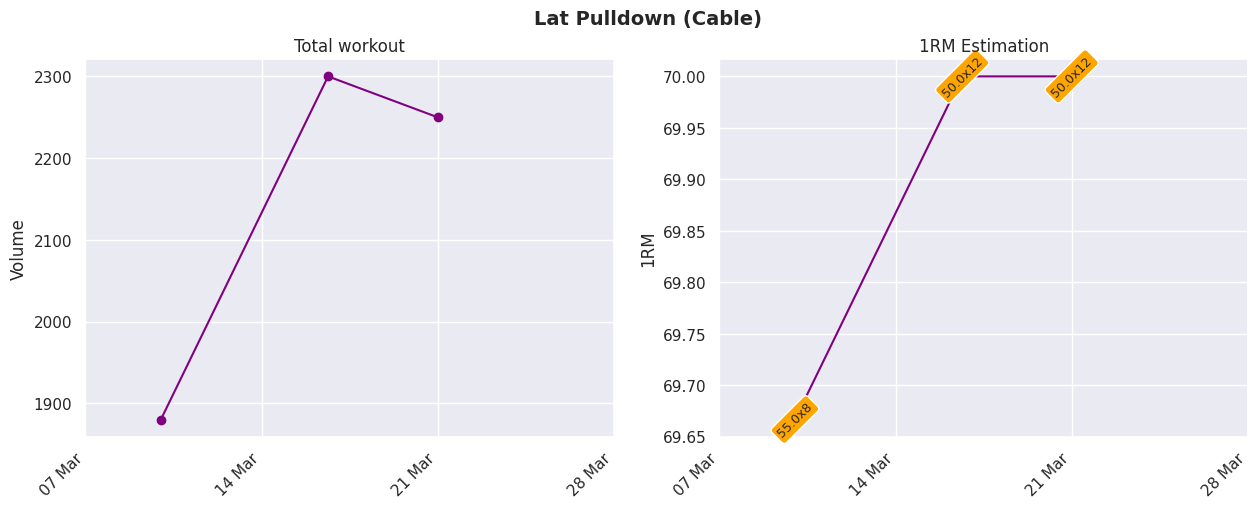

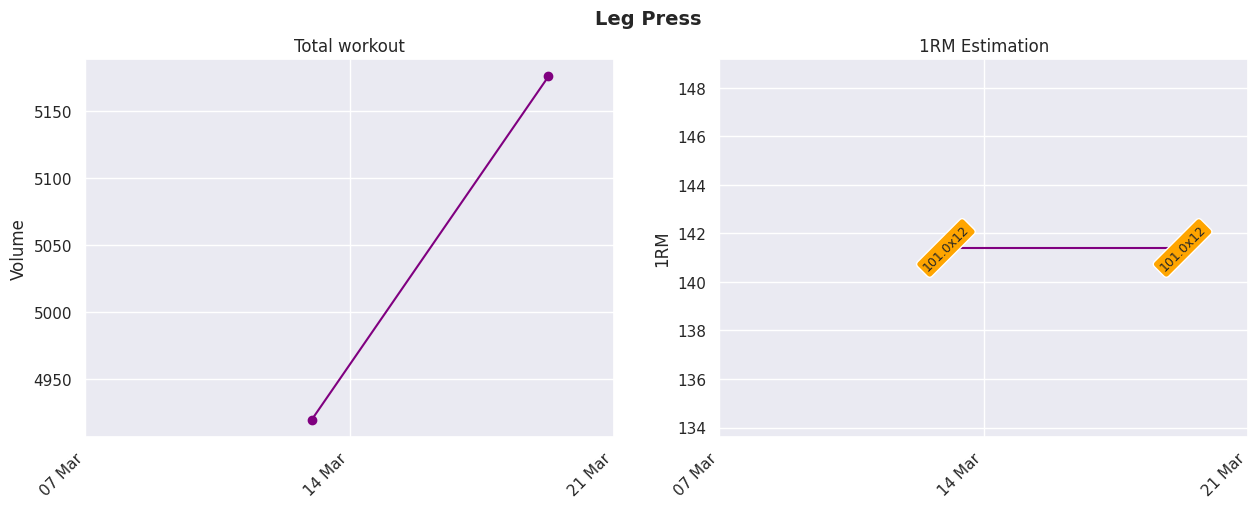

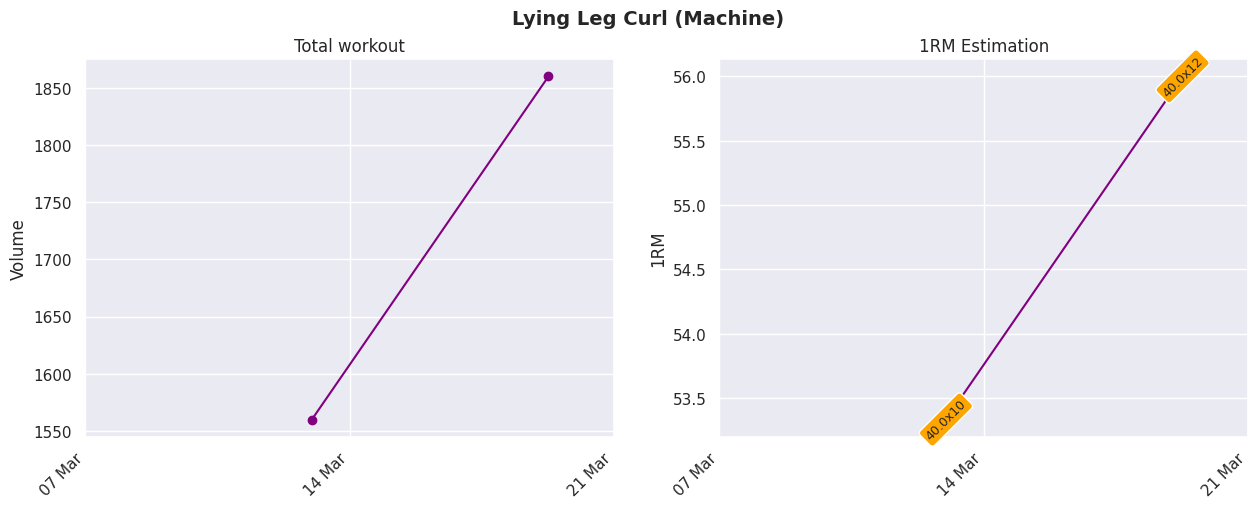

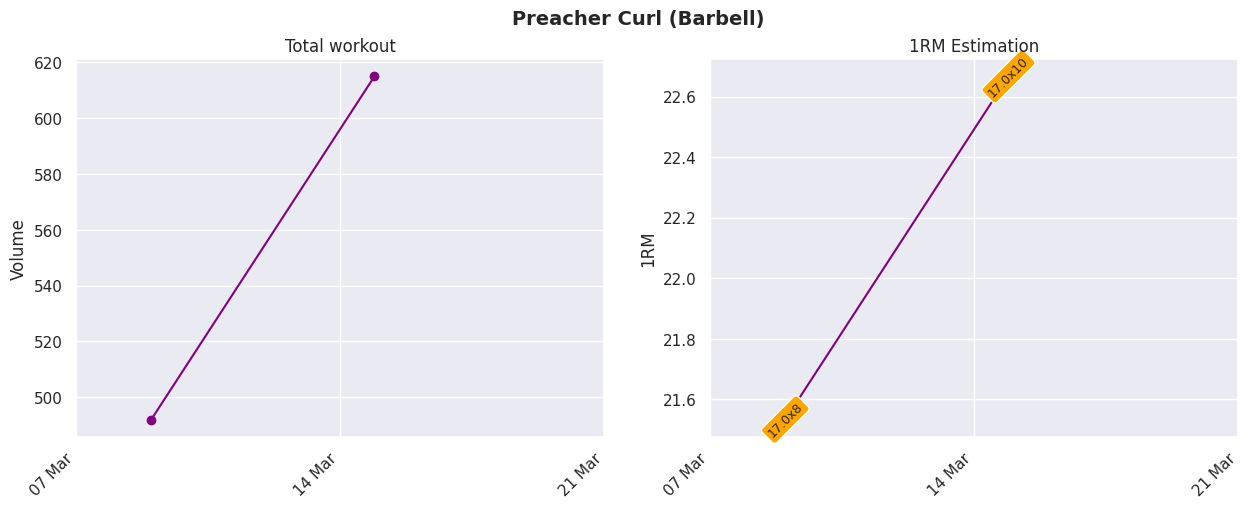

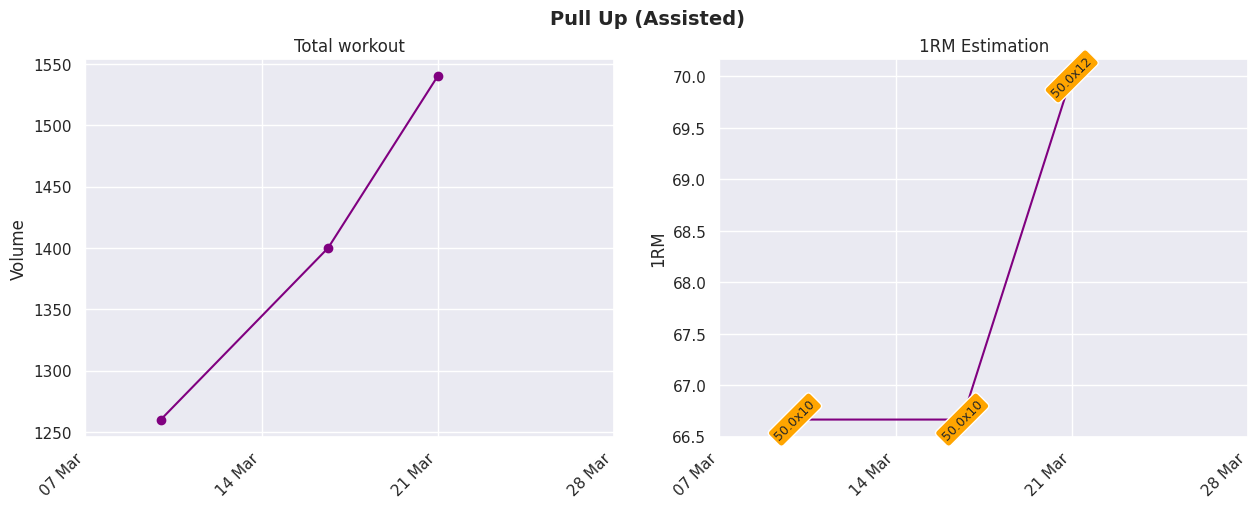

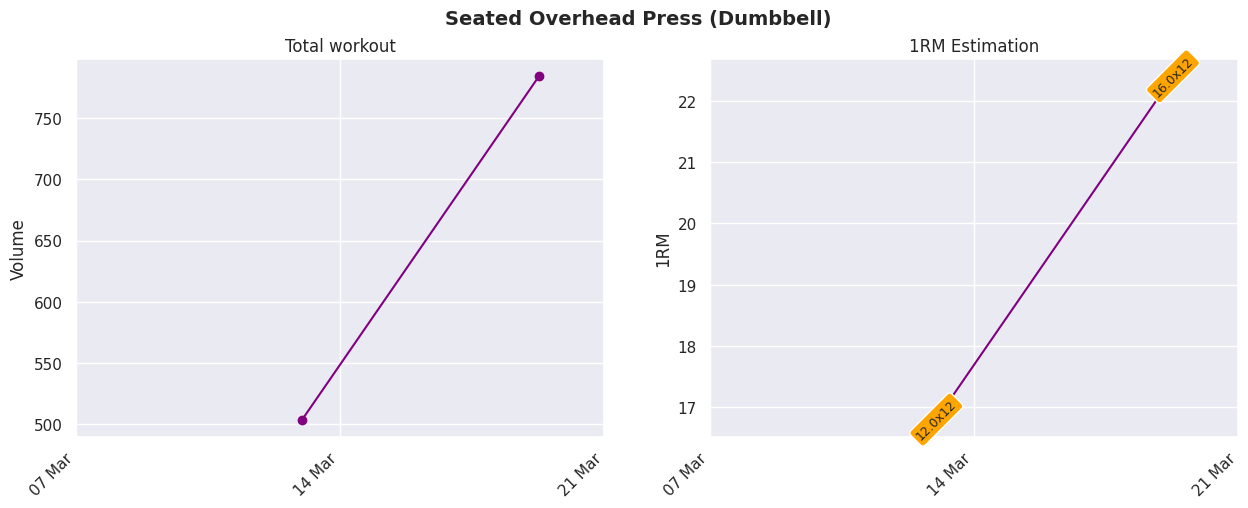

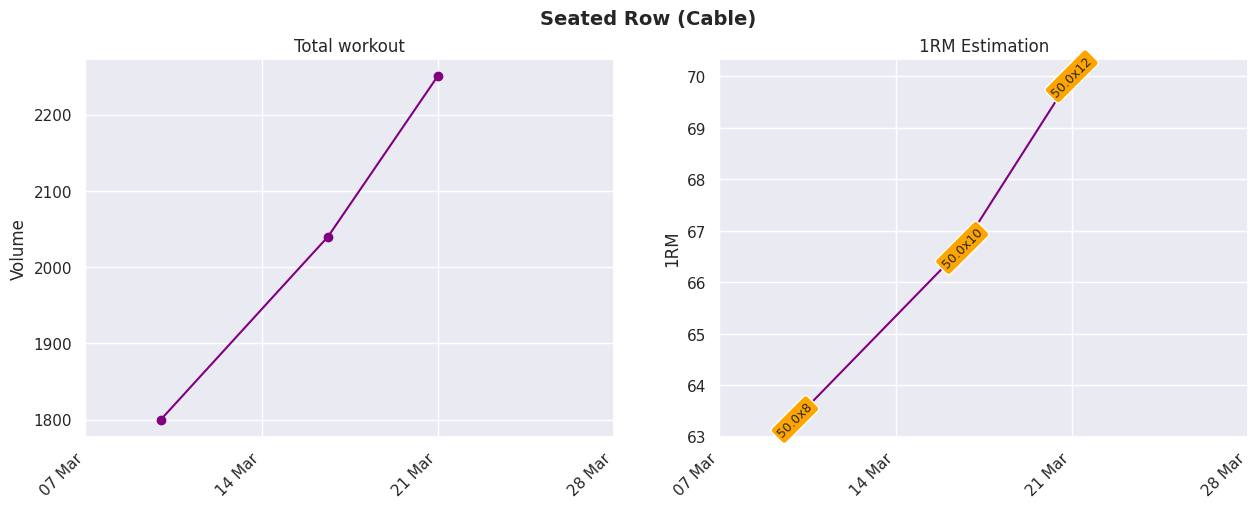

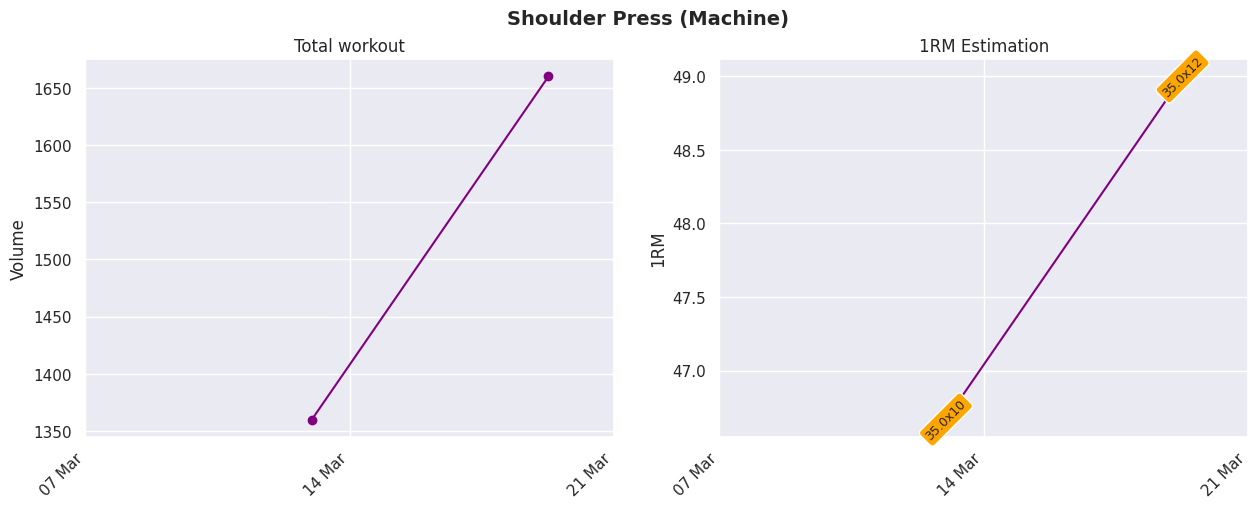

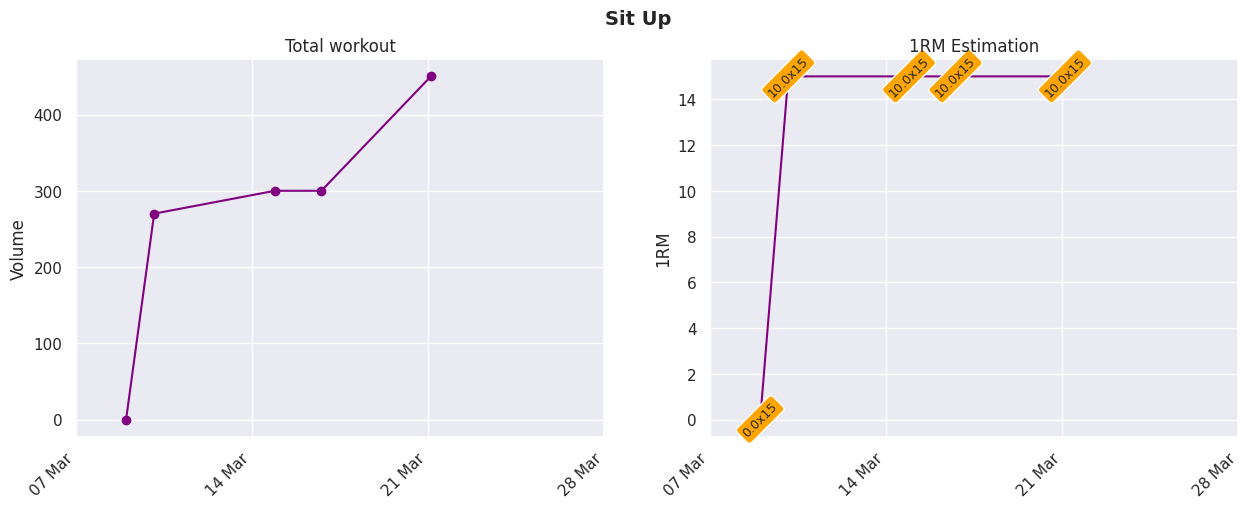

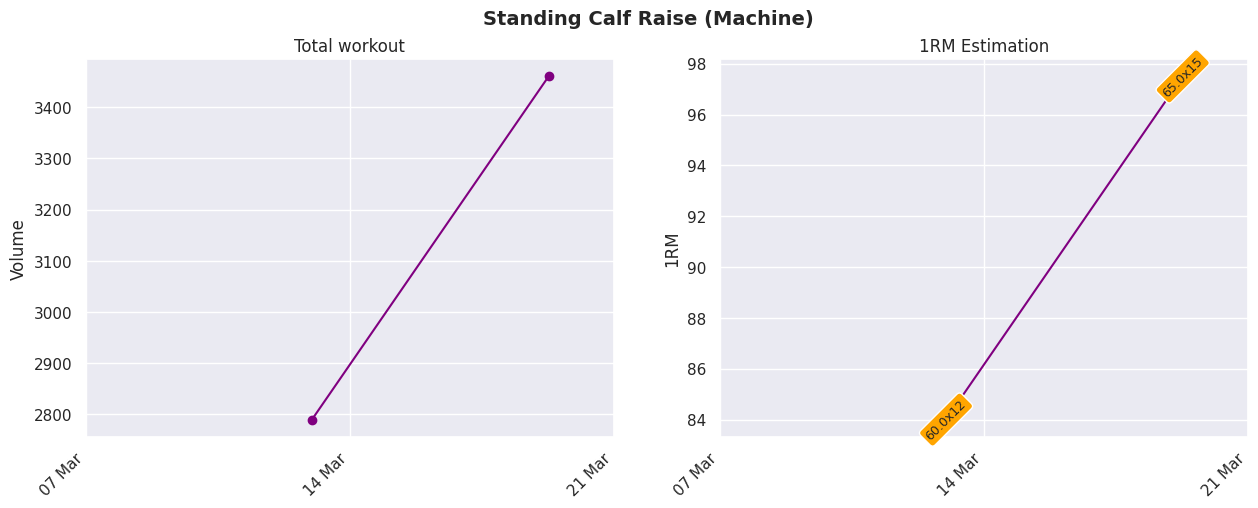

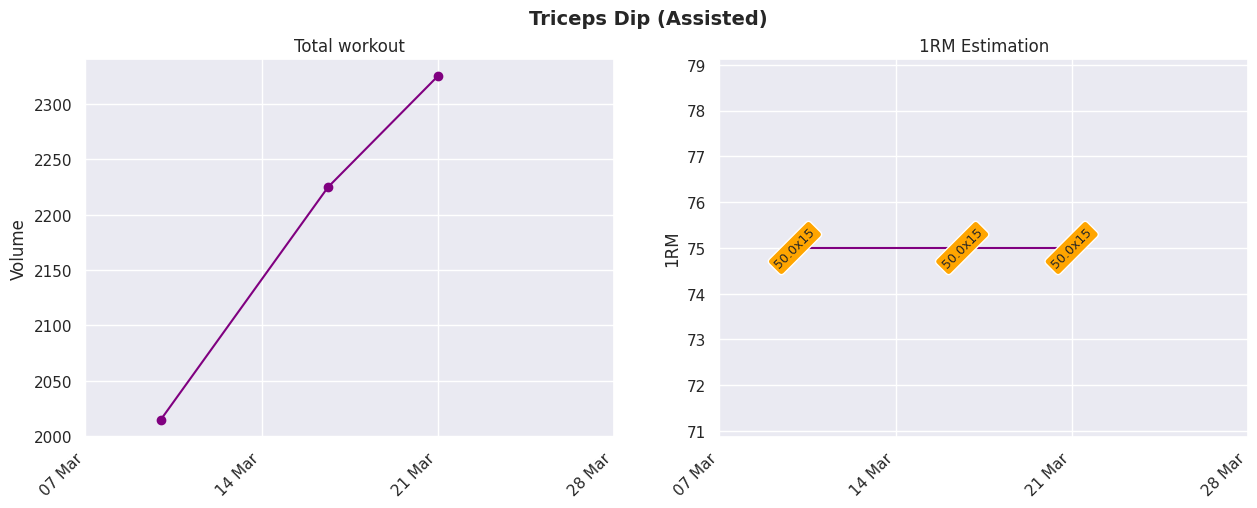

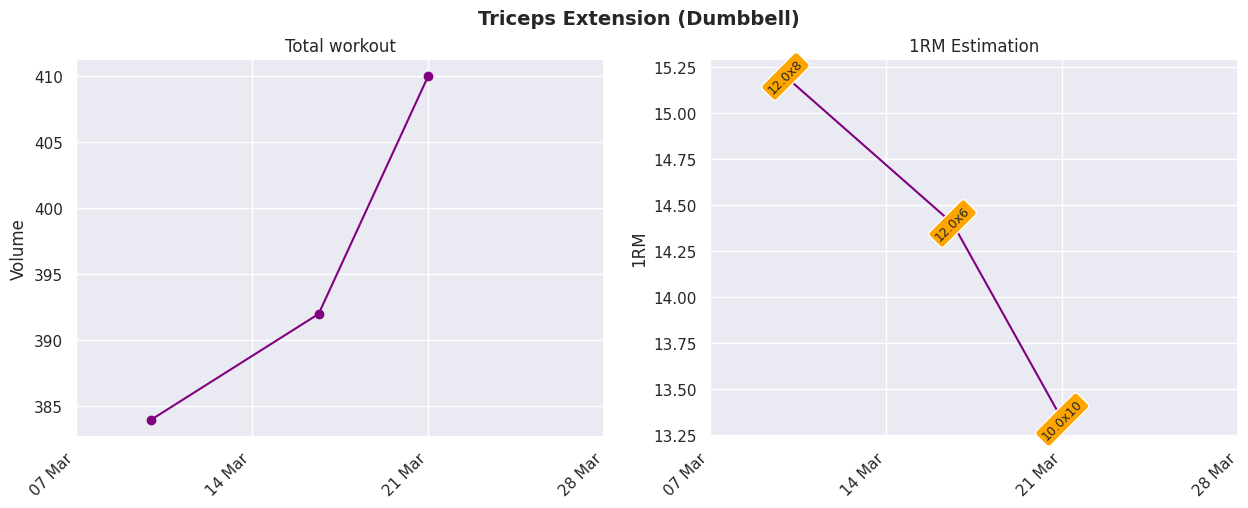

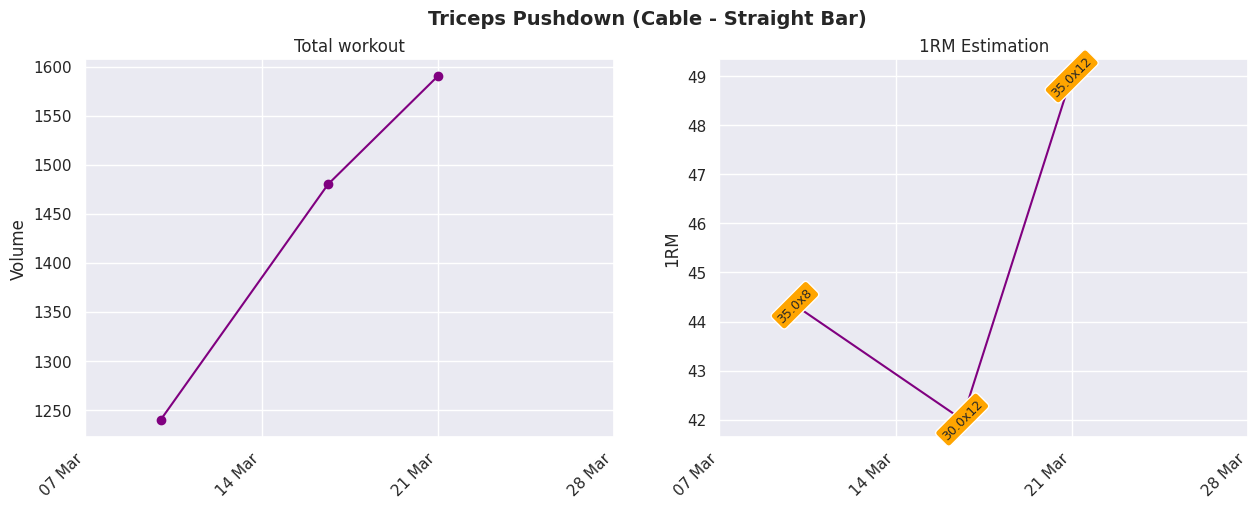

In [278]:
%matplotlib inline


__USER__ = "Ivan"

work_data = data.loc[data['user'] == __USER__]


agg_value = work_data.groupby(['date', 'wname'], as_index=False)[['date', 'wname', 'volume']].sum()

sns.set()
fig= plt.figure(figsize=(20,5), dpi=200)
index = 1
fig.suptitle("Workouts (Volume x Day)", fontsize=14, fontweight='bold')
fig.tight_layout()

for element_name, element in agg_value.groupby('wname'):
       
    x = element['date']
    y = element['volume'].to_numpy()
    
  
    ax = fig.add_subplot(1,3,index)
    index+=1
    ax = setup_axes(ax, x,y, element_name, "")
    
                    
for group_name, dfe in work_data[['ename','date', 'w', 'r', 'volume','1rm', 'str']].groupby(['ename']):
    
    sns.set()
    
    fig = plt.figure(figsize=(15,5), dpi=100)
    fig.suptitle(group_name, fontsize=14, fontweight='bold')
    fig.tight_layout()
    
    agg_ex = dfe.groupby(['date'], as_index=False)[['date','volume']].sum()
    volume_ex_date = agg_ex['date']
    volume_ex_volu = agg_ex['volume'].to_numpy()
    
    ax_volume = setup_axes(fig.add_subplot(1,2,1), volume_ex_date, volume_ex_volu, "Total workout", y_name='Volume')
    
   
    rm_data = dfe.loc[dfe.groupby(['date'])['1rm'].idxmax()]
    
    rm_ex_date = rm_data['date']
    rm_ex = rm_data['1rm'].to_numpy()
    rm_ex_label = list(rm_data['str'])
    
    ax_1rm = setup_axes(fig.add_subplot(1,2,2), rm_ex_date, rm_ex, "1RM Estimation", annotation=rm_ex_label, y_name = "1RM")
   
    
multipage('multipage.pdf')